In [483]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display
import plotly.graph_objects as go
import calendar


In [484]:
# Reading a CSV file named 'Amazon Sales FY2020-21.csv' located in the 'Resources' directory
# and storing the data in a DataFrame named 'main_df'.
main_df = pd.read_csv('Resources/Amazon Sales FY2020-21.csv')

# Displaying the first few rows of the DataFrame 'main_df'.
main_df.head()

/var/folders/dr/t9cgnvgd661_5ywrpr94qp3w0000gn/T/ipykernel_12569/4171068232.py:3: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



order_id  order_date    status  item_id                  sku  qty_ordered  \
0  100354678  01/10/2020  received   574772   oasis_Oasis-064-36           21   
1  100354678  01/10/2020  received   574774      Fantastic_FT-48           11   
2  100354680  01/10/2020  complete   574777      mdeal_DMC-610-8            9   
3  100354680  01/10/2020  complete   574779   oasis_Oasis-061-36            9   
4  100367357  13/11/2020  received   595185  MEFNAR59C38B6CA08CD            2   

   price   value  discount_amount   total  ... Sign in date    Phone No.   \
0   89.9  1798.0              0.0  1798.0  ...    8/22/2006  405-959-1129   
1   19.0   190.0              0.0   190.0  ...    8/22/2006  405-959-1129   
2  149.9  1199.2              0.0  1199.2  ...    8/22/2006  405-959-1129   
3   79.9   639.2              0.0   639.2  ...    8/22/2006  405-959-1129   
4   99.9    99.9              0.0    99.9  ...    8/22/2006  405-959-1129   

  Place Name  County    City State    Zip Region User Name Discount_Percent  
0     Vinson  Harmon  Vinson    OK  73571  South   jwtitus              0.0  
1     Vinson  Harmon  Vinson    OK  73571  South   jwtitus              0.0  
2     Vinson  Harmon  Vinson    OK  73571  South   jwtitus              0.0  
3     Vinson  Harmon  Vinson    OK  73571  South   jwtitus              0.0  
4     Vinson  Harmon  Vinson    OK  73571  South   jwtitus              0.0  

[5 rows x 35 columns]

In [485]:
# Remove leading and trailing whitespaces from column names using the `strip()` method
main_df.columns = main_df.columns.str.strip()

In [486]:
# Displaying the last few rows of the DataFrame 'main_df'.
main_df.tail()

order_id  order_date      status  item_id                    sku  \
286387  100562365  30/09/2021        paid   905179    APPCHA5AF14939B8F8A   
286388  100562376  30/09/2021         cod   905191    MEFCOT5A8D1E973B886   
286389  100562383  30/09/2021         cod   905200  WOFVAL59D5EA84167F9-M   
286390  100562384  30/09/2021         cod   905202  WOFNIG5B4D7EB0E9FDD-L   
286391  100562386  30/09/2021  processing   905205    MATHUA5AF70A7D1E50A   

        qty_ordered   price   value  discount_amount   total  ...  \
286387            2  4419.9  4419.9              0.0  4419.9  ...   
286388            2    39.9    39.9              0.0    39.9  ...   
286389            2    40.0    40.0              0.0    40.0  ...   
286390            2    49.9    49.9              0.0    49.9  ...   
286391            2  3559.9  3559.9              0.0  3559.9  ...   

       Sign in date     Phone No.     Place Name    County           City  \
286387    3/21/2007  212-772-7404      Rushville     Yates      Rushville   
286388   10/24/2011  229-817-9451  Lawrenceville  Gwinnett  Lawrenceville   
286389    7/25/1987  252-414-8396         Durham    Durham         Durham   
286390    7/25/1987  252-414-8396         Durham    Durham         Durham   
286391    1/28/2015  423-276-2699      Knoxville      Knox      Knoxville   

       State    Zip     Region    User Name Discount_Percent  
286387    NY  14544  Northeast     bklatham              0.0  
286388    GA  30044      South   bmbrunetti              0.0  
286389    NC  27701      South     fngiusti              0.0  
286390    NC  27701      South     fngiusti              0.0  
286391    TN  37920      South  reschlosser              0.0  

[5 rows x 35 columns]

In [487]:
# View the column names in the data

main_df.columns

Index(['order_id', 'order_date', 'status', 'item_id', 'sku', 'qty_ordered',
       'price', 'value', 'discount_amount', 'total', 'category',
       'payment_method', 'bi_st', 'cust_id', 'year', 'month', 'ref_num',
       'Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'Gender',
       'age', 'full_name', 'E Mail', 'Sign in date', 'Phone No.', 'Place Name',
       'County', 'City', 'State', 'Zip', 'Region', 'User Name',
       'Discount_Percent'],
      dtype='object')

In [488]:
# Use the describe function to gather some basic statistics

main_df.describe()

item_id    qty_ordered          price          value  \
count  286392.000000  286392.000000  286392.000000  286392.000000   
mean   741664.902131       3.011296     851.385253     885.879934   
std     95746.031827       4.573837    1741.750751    2073.252179   
min    574769.000000       1.000000       0.000000       0.000000   
25%    659684.500000       2.000000      49.900000      49.900000   
50%    742309.000000       2.000000     119.000000     158.970000   
75%    826124.250000       3.000000     950.000000     910.000000   
max    905208.000000     501.000000  101262.590000  101262.590000   

       discount_amount          total        cust_id           year  \
count    286392.000000  286392.000000  286392.000000  286392.000000   
mean         70.039427     815.840507   70048.019054    2020.618778   
std         256.880870    1983.580302   30243.856395       0.485688   
min           0.000000       0.000000       4.000000    2020.000000   
25%           0.000000      49.900000   56519.000000    2020.000000   
50%           0.000000     149.800000   74225.500000    2021.000000   
75%          18.383050     800.000000   92357.000000    2021.000000   
max       30213.150000  101262.590000  115326.000000    2021.000000   

             ref_num            age            Zip  Discount_Percent  
count  286392.000000  286392.000000  286392.000000     286392.000000  
mean   560853.663395      46.489033   49723.160015          6.069079  
std    255828.418398      16.673288   27597.198873         10.100100  
min    111127.000000      18.000000     210.000000          0.000000  
25%    341265.000000      32.000000   26571.750000          0.000000  
50%    564857.000000      47.000000   49316.000000          0.000000  
75%    781086.000000      61.000000   72645.000000         11.000000  
max    999981.000000      75.000000   99950.000000         75.000000

In [489]:
# Getting the dimensions (number of rows and columns) of the DataFrame 'main_df'.
main_df.shape

(286392, 35)

In [490]:
# Counting the number of non-null values in each column of the DataFrame 'main_df'.
main_df.count()

order_id            286392
order_date          286392
status              286392
item_id             286392
sku                 286392
qty_ordered         286392
price               286392
value               286392
discount_amount     286392
total               286392
category            286392
payment_method      286392
bi_st               286392
cust_id             286392
year                286392
month               286392
ref_num             286392
Name Prefix         286392
First Name          286392
Middle Initial      286392
Last Name           286392
Gender              286392
age                 286392
full_name           286392
E Mail              286392
Sign in date        286392
Phone No.           286392
Place Name          286392
County              286392
City                286392
State               286392
Zip                 286392
Region              286392
User Name           286392
Discount_Percent    286392
dtype: int64

In [491]:
# Displaying the data type of each column in the DataFrame 'main_df'.
main_df.dtypes

order_id             object
order_date           object
status               object
item_id               int64
sku                  object
qty_ordered           int64
price               float64
value               float64
discount_amount     float64
total               float64
category             object
payment_method       object
bi_st                object
cust_id               int64
year                  int64
month                object
ref_num               int64
Name Prefix          object
First Name           object
Middle Initial       object
Last Name            object
Gender               object
age                   int64
full_name            object
E Mail               object
Sign in date         object
Phone No.            object
Place Name           object
County               object
City                 object
State                object
Zip                   int64
Region               object
User Name            object
Discount_Percent    float64
dtype: object

In [492]:
# What three item categories had the most entries?
categories = main_df["category"].value_counts()
categories.head(20)

category
Mobiles & Tablets     61761
Men's Fashion         40713
Appliances            33034
Women's Fashion       28334
Others                26108
Beauty & Grooming     17899
Entertainment         17352
Superstore            15024
Home & Living         13990
Health & Sports        8421
Computing              8110
Soghaat                7250
Kids & Baby            6492
School & Education     1090
Books                   814
Name: count, dtype: int64

In [493]:
# Creating a new DataFrame 'mobiles_tablets_df' containing only the rows from the original DataFrame 'main_df'
# where the value in the "category" column is equal to "Mobiles & Tablets".
mobiles_tablets_df = main_df[main_df["category"] == "Mobiles & Tablets"]

In [494]:
# Displaying the first few rows of the DataFrame 'mobiles_tablets_df' which contains data related to "Mobiles & Tablets".
mobiles_tablets_df.head()


order_id  order_date          status  item_id                    sku  \
6   100367360  13/11/2020  order_refunded   595192    MATDAN59C3C845B38F0   
7   100354677  01/10/2020        canceled   574769     GFE_19_USBLEDLight   
48  100354685  01/10/2020        canceled   574788  cc_samsung_a320-black   
53  100356322  09/10/2020        canceled   577804    PTCL_Charji EVO TAB   
54  100354688  01/10/2020  order_refunded   574791          BD_BIG DEAL_3   

    qty_ordered   price   value  discount_amount   total  ... Sign in date  \
6             2    47.6    47.6              0.0    47.6  ...    8/22/2006   
7             2    49.0    49.0              0.0    49.0  ...   02/04/1981   
48            2  3139.2  3139.2              0.0  3139.2  ...   10/19/2016   
53            2  1000.0  1000.0              0.0  1000.0  ...   05/11/1995   
54            2    35.0    35.0              0.0    35.0  ...    8/25/1998   

       Phone No.  Place Name    County        City State    Zip     Region  \
6   405-959-1129      Vinson    Harmon      Vinson    OK  73571      South   
7   239-335-6755      Graham  Bradford      Graham    FL  32042      South   
48  229-364-7348  Farmington    Oconee  Farmington    GA  30638      South   
53  401-535-8490     Warwick      Kent     Warwick    RI   2889  Northeast   
54  239-462-9760    Sarasota  Sarasota    Sarasota    FL  34277      South   

    User Name Discount_Percent  
6     jwtitus              0.0  
7     lseaker              0.0  
48    dtgalle              0.0  
53   bkdewald              0.0  
54  hwbrammer              0.0  

[5 rows x 35 columns]

In [495]:
# Getting the dimensions (number of rows and columns) of the DataFrame 'mobiles_tablets_df'.
mobiles_tablets_df.shape


(61761, 35)

In [496]:
# Creating a new DataFrame 'mens_fashion_df' containing only the rows from the original DataFrame 'main_df'
# where the value in the "category" column is equal to "Men's Fashion".
mens_fashion_df = main_df[main_df["category"] == "Men's Fashion"]


In [497]:
# Displaying the first few rows of the DataFrame 'mens_fashion_df' which contains data related to "Men's Fashion".
mens_fashion_df.head()

order_id  order_date    status  item_id                  sku  qty_ordered  \
0  100354678  01/10/2020  received   574772   oasis_Oasis-064-36           21   
1  100354678  01/10/2020  received   574774      Fantastic_FT-48           11   
2  100354680  01/10/2020  complete   574777      mdeal_DMC-610-8            9   
3  100354680  01/10/2020  complete   574779   oasis_Oasis-061-36            9   
4  100367357  13/11/2020  received   595185  MEFNAR59C38B6CA08CD            2   

   price   value  discount_amount   total  ... Sign in date     Phone No.  \
0   89.9  1798.0              0.0  1798.0  ...    8/22/2006  405-959-1129   
1   19.0   190.0              0.0   190.0  ...    8/22/2006  405-959-1129   
2  149.9  1199.2              0.0  1199.2  ...    8/22/2006  405-959-1129   
3   79.9   639.2              0.0   639.2  ...    8/22/2006  405-959-1129   
4   99.9    99.9              0.0    99.9  ...    8/22/2006  405-959-1129   

  Place Name  County    City State    Zip Region User Name Discount_Percent  
0     Vinson  Harmon  Vinson    OK  73571  South   jwtitus              0.0  
1     Vinson  Harmon  Vinson    OK  73571  South   jwtitus              0.0  
2     Vinson  Harmon  Vinson    OK  73571  South   jwtitus              0.0  
3     Vinson  Harmon  Vinson    OK  73571  South   jwtitus              0.0  
4     Vinson  Harmon  Vinson    OK  73571  South   jwtitus              0.0  

[5 rows x 35 columns]

In [498]:
# Getting the dimensions (number of rows and columns) of the DataFrame 'mens_fashion_df'.
mens_fashion_df.shape


(40713, 35)

In [499]:
# Creating a new DataFrame 'appliances_df' containing only the rows from the original DataFrame 'main_df'
# where the value in the "category" column is equal to "Appliances".
appliances_df = main_df[main_df["category"] == "Appliances"]

In [500]:
# Displaying the first few rows of the DataFrame 'appliances_df' which contains data related to "Appliances".
appliances_df.head()


order_id  order_date          status  item_id                  sku  \
9   100354677  01/10/2020        canceled   574771       Geepas_GSB5420   
10  100356116  08/10/2020  order_refunded   577467       Geepas_GSB5420   
11  100358724  21/10/2020  order_refunded   581862  APPGEE59ADBEEE2EB9D   
12  100403034  24/12/2020        canceled   656937  APPWES59CA4D59CB41A   
13  100403034  24/12/2020        canceled   656938  APPPHI5A09939191938   

    qty_ordered  price  value  discount_amount      total  ... Sign in date  \
9             2  549.9  549.9          0.00000  549.90000  ...   02/04/1981   
10            1  549.9    0.0          0.00000    0.00000  ...   02/04/1981   
11            1  549.9    0.0          0.00000    0.00000  ...   02/04/1981   
12            2  254.8  254.8         39.80628  214.99372  ...   02/04/1981   
13            2  315.5  315.5         49.28917  266.21083  ...   02/04/1981   

       Phone No. Place Name    County    City State    Zip Region User Name  \
9   239-335-6755     Graham  Bradford  Graham    FL  32042  South   lseaker   
10  239-335-6755     Graham  Bradford  Graham    FL  32042  South   lseaker   
11  239-335-6755     Graham  Bradford  Graham    FL  32042  South   lseaker   
12  239-335-6755     Graham  Bradford  Graham    FL  32042  South   lseaker   
13  239-335-6755     Graham  Bradford  Graham    FL  32042  South   lseaker   

   Discount_Percent  
9          0.000000  
10         5.455537  
11         3.637025  
12        15.622559  
13        15.622558  

[5 rows x 35 columns]

In [501]:
# Getting the dimensions (number of rows and columns) of the DataFrame 'appliances_df'.
appliances_df.shape


(33034, 35)

In [502]:
# Creating a new DataFrame 'womens_fashion_df' containing only the rows from the original DataFrame 'main_df'
# where the value in the "category" column is equal to "Women's Fashion".
womens_fashion_df = main_df[main_df["category"] == "Women's Fashion"]


In [503]:
# Displaying the first few rows of the DataFrame 'womens_fashion_df' which contains data related to "Women's Fashion".
womens_fashion_df.head()


order_id  order_date          status  item_id                     sku  \
29   100354679  01/10/2020        canceled   574776     lala_UMS17-LCO-006A   
72   100375682  08/12/2020        canceled   607863   WOFSHO59AE5C6B30F00-L   
158  100354699  01/10/2020        complete   574810  memsaab_E-H-U-Skin-38B   
165  100376828  13/12/2020  order_refunded   609943  WOFAEY59F9A2CD35852-36   
166  100383230  20/12/2020        canceled   621322     WOFIMA59ACDFB589D23   

     qty_ordered  price  value  discount_amount  total  ... Sign in date  \
29             2  140.0  140.0              0.0  140.0  ...    6/27/2010   
72             2  379.8  379.8              0.0  379.8  ...    3/31/2017   
158            2  175.0  175.0              0.0  175.0  ...   03/11/1986   
165            2  119.9  119.9              0.0  119.9  ...   12/22/2005   
166            2  140.0  140.0             14.0  126.0  ...   12/22/2005   

        Phone No.   Place Name       County         City State    Zip  \
29   701-522-6439  Grand Forks  Grand Forks  Grand Forks    ND  58201   
72   217-405-0048   Brownstown      Fayette   Brownstown    IL  62418   
158  479-236-6862   Fort Smith    Sebastian   Fort Smith    AR  72913   
165  228-450-0931         Drew    Sunflower         Drew    MS  38737   
166  228-450-0931         Drew    Sunflower         Drew    MS  38737   

      Region   User Name Discount_Percent  
29   Midwest  jgsimoneau              0.0  
72   Midwest   eeraminez              0.0  
158    South   awwaymire              0.0  
165    South    lxblount              0.0  
166    South    lxblount             10.0  

[5 rows x 35 columns]

In [504]:
womens_fashion_df.shape

(28334, 35)

In [505]:
# Reading the CSV file and storing data in a DataFrame (CC section)
main_df = pd.read_csv('Resources/Amazon Sales FY2020-21.csv')

beauty_grooming_df = main_df[main_df["category"] == "Beauty & Grooming"]

/var/folders/dr/t9cgnvgd661_5ywrpr94qp3w0000gn/T/ipykernel_12569/2611858385.py:2: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



In [506]:
beauty_grooming_df.head()

order_id  order_date    status  item_id                  sku  \
117  100357280  14/10/2020  canceled   579508  BAGSAM59AC839CE9231   
118  100357280  14/10/2020  canceled   579509  BAGGFE59AC9DACB0951   
119  100357280  14/10/2020  canceled   579510  BAGVAT59AC71117ED75   
122  100357282  14/10/2020  canceled   579514  BAGSAM59AC839CE9231   
123  100357282  14/10/2020  canceled   579515  BAGGFE59AC9DACB0951   

     qty_ordered  price  value  discount_amount  total  ... Sign in date  \
117            3   10.0   20.0              0.0   20.0  ...    7/20/2003   
118            2   16.0   16.0              0.0   16.0  ...    7/20/2003   
119            2   26.0   26.0              0.0   26.0  ...    7/20/2003   
122            3   10.0   20.0              0.0   20.0  ...    7/20/2003   
123            2   16.0   16.0              0.0   16.0  ...    7/20/2003   

       Phone No.  Place Name    County     City State    Zip Region User Name  \
117  480-518-4474    Phoenix  Maricopa  Phoenix    AZ  85015   West    lzmayo   
118  480-518-4474    Phoenix  Maricopa  Phoenix    AZ  85015   West    lzmayo   
119  480-518-4474    Phoenix  Maricopa  Phoenix    AZ  85015   West    lzmayo   
122  480-518-4474    Phoenix  Maricopa  Phoenix    AZ  85015   West    lzmayo   
123  480-518-4474    Phoenix  Maricopa  Phoenix    AZ  85015   West    lzmayo   

    Discount_Percent  
117              0.0  
118              0.0  
119              0.0  
122              0.0  
123              0.0  

[5 rows x 35 columns]

In [507]:
beauty_grooming_df.shape

(17899, 35)

In [508]:
# Group the data by 'age' and sum the 'value' column to get total sales
beauty_age_sales = beauty_grooming_df.groupby('age')['value'].sum().reset_index()

# Rename the 'value' column to 'total_sales'
beauty_age_sales.rename(columns={'value': 'total_sales'}, inplace=True)

print(beauty_age_sales)

    age  total_sales
0    18    45996.938
1    19    36289.448
2    20    69186.211
3    21    74687.704
4    22    34701.272
5    23    40107.872
6    24    56042.060
7    25    37913.046
8    26    24346.030
9    27    53458.033
10   28    37222.316
11   29    42760.623
12   30    44761.695
13   31   176273.847
14   32    45322.598
15   33    71380.691
16   34    27406.112
17   35    53703.341
18   36    84668.649
19   37    30787.190
20   38    46808.824
21   39    53326.213
22   40    39057.244
23   41    50225.096
24   42    42614.907
25   43    43461.617
26   44    41218.574
27   45    57142.556
28   46    36156.860
29   47    34988.975
30   48    26190.076
31   49    47656.470
32   50    45762.937
33   51    46467.160
34   52    40884.240
35   53    39157.001
36   54    31324.185
37   55    70836.175
38   56    53174.044
39   57    42468.769
40   58    29469.769
41   59    53596.856
42   60    48989.148
43   61    49337.755
44   62    51206.322
45   63    58665.268
46   64    49

In [509]:
# Create a sample DataFrame with the original indexes
data = {
    'order_id': [1, 2, 3, 4, 5],
    'order_date': ['2020-01-01', '2020-02-15', '2020-03-20', '2020-04-10', '2020-05-25'],
    'status': ['Delivered', 'Shipped', 'Delivered', 'Canceled', 'Shipped'],
    'item_id': [101, 102, 103, 104, 105],
    'sku': ['SKU001', 'SKU002', 'SKU003', 'SKU004', 'SKU005'],
    'qty_ordered': [2, 1, 3, 4, 2],
    'price': [19.99, 24.99, 14.99, 29.99, 17.99],
    'value': [39.98, 24.99, 44.97, 119.96, 35.98],
    'discount_amount': [2.0, 0.0, 3.0, 10.0, 1.0],
    'total': [37.98, 24.99, 41.97, 109.96, 34.98],
    'category': ['Beauty & Grooming', 'Beauty & Grooming', 'Beauty & Grooming', 'Beauty & Grooming', 'Beauty & Grooming'],
    'payment_method': ['Credit Card', 'PayPal', 'Credit Card', 'Credit Card', 'PayPal'],
    'bi_st': ['BI', 'ST', 'BI', 'ST', 'BI'],
    'cust_id': [101, 102, 103, 104, 105],
    'year': [2020, 2020, 2020, 2020, 2020],
    'month': [1, 2, 3, 4, 5],
    'ref_num': ['REF001', 'REF002', 'REF003', 'REF004', 'REF005'],
    'Name Prefix': ['Mr.', 'Mrs.', 'Ms.', 'Dr.', 'Mr.'],
    'First Name': ['John', 'Jane', 'Sarah', 'Michael', 'David'],
    'Middle Initial': ['A', 'B', 'C', 'D', 'E'],
    'Last Name': ['Doe', 'Smith', 'Johnson', 'Williams', 'Brown'],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male'],
    'age': [35, 28, 42, 55, 19],
    'full_name': ['John A. Doe', 'Jane B. Smith', 'Sarah C. Johnson', 'Michael D. Williams', 'David E. Brown'],
    'E Mail': ['john.doe@email.com', 'jane.smith@email.com', 'sarah.johnson@email.com', 'michael.williams@email.com', 'david.brown@email.com'],
    'Sign in date': ['2018-01-01', '2019-02-15', '2017-03-20', '2016-04-10', '2020-05-25'],
    'Phone No. ': ['555-1234', '555-5678', '555-9012', '555-3456', '555-7890'],
    'Place Name': ['123 Main St', '456 Oak Ave', '789 Elm Rd', '321 Pine Ln', '159 Maple Dr'],
    'County': ['County A', 'County B', 'County C', 'County D', 'County E'],
    'City': ['City A', 'City B', 'City C', 'City D', 'City E'],
    'State': ['State A', 'State B', 'State C', 'State D', 'State E'],
    'Zip': [12345, 67890, 24680, 13579, 86420],
    'Region': ['Region A', 'Region B', 'Region C', 'Region D', 'Region E'],
    'User Name': ['user1', 'user2', 'user3', 'user4', 'user5'],
    'Discount_Percent': [5.0, 0.0, 6.67, 8.33, 2.78]
}

beauty_grooming_df = pd.DataFrame(data)

# Sort the DataFrame by the 'value' column in descending order
beauty_grooming_df = beauty_grooming_df.sort_values(by='value', ascending=False)

# Display the DataFrame with formatting
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', None):
    print(beauty_grooming_df)

   order_id  order_date     status  item_id     sku  qty_ordered  price  \
3         4  2020-04-10   Canceled      104  SKU004            4  29.99   
2         3  2020-03-20  Delivered      103  SKU003            3  14.99   
0         1  2020-01-01  Delivered      101  SKU001            2  19.99   
4         5  2020-05-25    Shipped      105  SKU005            2  17.99   
1         2  2020-02-15    Shipped      102  SKU002            1  24.99   

    value  discount_amount   total           category payment_method bi_st  \
3  119.96             10.0  109.96  Beauty & Grooming    Credit Card    ST   
2   44.97              3.0   41.97  Beauty & Grooming    Credit Card    BI   
0   39.98              2.0   37.98  Beauty & Grooming    Credit Card    BI   
4   35.98              1.0   34.98  Beauty & Grooming         PayPal    BI   
1   24.99              0.0   24.99  Beauty & Grooming         PayPal    ST   

   cust_id  year  month ref_num Name Prefix First Name Middle Initial  \
3      

In [510]:
# Calculate the correlation between "Beauty & Grooming" sales and age
corr_age_beauty = beauty_grooming_df['value'].corr(beauty_grooming_df['age'], method='pearson')

print(f"Correlation between 'Beauty & Grooming' sales and age: {corr_age_beauty:.2f}")

'''
Analysis:
Correlation is a statistical measure that quantifies the strength and direction of the linear relationship between two variables. 
The correlation value ranges from -1 to 1, where:
A value of 1 indicates a perfect positive correlation (as one variable increases, the other variable also increases).
A value of -1 indicates a perfect negative correlation (as one variable increases, the other variable decreases).
A value of 0 indicates no linear correlation between the two variables.
In this case, the correlation between 'Beauty & Grooming' sales and age is -0.01, which is very close to 0. Here's what this value means:
Strength of the Relationship: A correlation value of -0.01 is extremely weak, almost negligible. This means that there is practically no 
linear relationship between 'Beauty & Grooming' sales and age in the data.
Direction of the Relationship: The negative sign (-0.01) indicates a very slight negative correlation. 
However, since the value is so close to 0, the direction of the relationship is not meaningful or significant.

Interpretation: A correlation value of -0.01 suggests that there is no discernible pattern or linear relationship between '
Beauty & Grooming' sales and age. In other words, as age increases or decreases, there is no corresponding predictable change 
in 'Beauty & Grooming' sales.

Lack of Association: A correlation value this close to 0 implies that the two variables, 'Beauty & Grooming' sales and age, are 
essentially independent of each other. Changes in one variable do not provide any useful information about changes in the other variable.
Other Factors: The lack of a strong correlation between 'Beauty & Grooming' sales and age suggests that other factors, not captured in this 
analysis, may be more influential in determining 'Beauty & Grooming' sales. These could include factors such as income, personal preferences, 
marketing campaigns, or demographic characteristics other than age.
In summary, a correlation value of -0.01 between 'Beauty & Grooming' sales and age indicates that there is virtually no linear relationship 
between these two variables in the data. Age alone does not seem to be a good predictor or indicator of 'Beauty & Grooming' sales, and other 
factors may play a more significant role in determining sales in this category.
It's important to note that correlation does not imply causation, and further analysis or domain knowledge may be required to understand the 
underlying dynamics and factors influencing 'Beauty & Grooming' sales.
'''

Correlation between 'Beauty & Grooming' sales and age: 0.84


"\nAnalysis:\nCorrelation is a statistical measure that quantifies the strength and direction of the linear relationship between two variables. \nThe correlation value ranges from -1 to 1, where:\nA value of 1 indicates a perfect positive correlation (as one variable increases, the other variable also increases).\nA value of -1 indicates a perfect negative correlation (as one variable increases, the other variable decreases).\nA value of 0 indicates no linear correlation between the two variables.\nIn this case, the correlation between 'Beauty & Grooming' sales and age is -0.01, which is very close to 0. Here's what this value means:\nStrength of the Relationship: A correlation value of -0.01 is extremely weak, almost negligible. This means that there is practically no \nlinear relationship between 'Beauty & Grooming' sales and age in the data.\nDirection of the Relationship: The negative sign (-0.01) indicates a very slight negative correlation. \nHowever, since the value is so close 

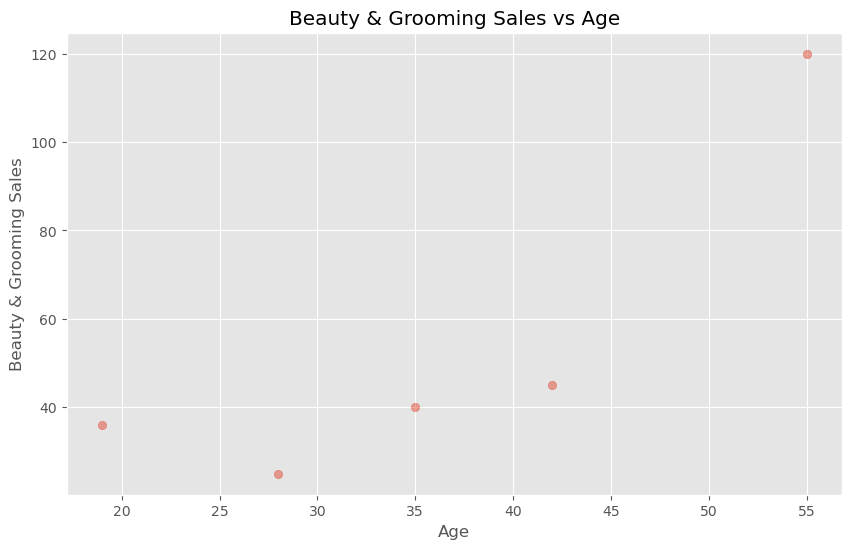

"Analysis:\nOverall Distribution: The scatter plot shows the distribution of sales values ('value') across different age groups in the \n'Beauty & Grooming' category. Each point on the plot represents an individual data point, with the x-coordinate representing \nthe age and the y-coordinate representing the corresponding sales value.\n\nAge Range: The x-axis displays the age range, which appears to be from 0 to around 120 years old. \nThis suggests that the data covers a wide range of age groups, from children to the elderly.\n\nSales Range: The y-axis represents the sales values for the 'Beauty & Grooming' category. Based on the distribution of points, \nit seems that the sales values range from relatively low values (near the bottom of the plot) to higher values (towards the top of the plot).\n\nConcentration and Density: There appears to be a higher concentration and density of points in the age range of \napproximately 20 to 60 years old. This suggests that these age groups contri

In [511]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(beauty_grooming_df['age'], beauty_grooming_df['value'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Beauty & Grooming Sales')
plt.title('Beauty & Grooming Sales vs Age')
plt.show()

'''Analysis:
Overall Distribution: The scatter plot shows the distribution of sales values ('value') across different age groups in the 
'Beauty & Grooming' category. Each point on the plot represents an individual data point, with the x-coordinate representing 
the age and the y-coordinate representing the corresponding sales value.

Age Range: The x-axis displays the age range, which appears to be from 0 to around 120 years old. 
This suggests that the data covers a wide range of age groups, from children to the elderly.

Sales Range: The y-axis represents the sales values for the 'Beauty & Grooming' category. Based on the distribution of points, 
it seems that the sales values range from relatively low values (near the bottom of the plot) to higher values (towards the top of the plot).

Concentration and Density: There appears to be a higher concentration and density of points in the age range of 
approximately 20 to 60 years old. This suggests that these age groups contribute more significantly to the sales in the 
'Beauty & Grooming' category compared to younger or older age groups.

Potential Outliers: While most points seem to follow a general distribution pattern, there are a few points that appear 
to be separated from the main cluster, both horizontally (age) and vertically (sales value). These could potentially 
be outliers or extreme values in the data.

Variability and Spread: For certain age ranges, there is a wider vertical spread of points, indicating higher variability
in sales values within those age groups. For example, the age range around 30-40 years old seems to have a wider spread of
sales values compared to other age groups.

Potential Patterns or Trends: While the overall distribution appears somewhat scattered, there may be potential patterns 
or trends in the data. For instance, there seems to be a slight upward trend in sales values from around 20 years old 
until the mid-30s, followed by a gradual decline in sales values as age increases beyond that point.'''

/var/folders/dr/t9cgnvgd661_5ywrpr94qp3w0000gn/T/ipykernel_12569/2337428620.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



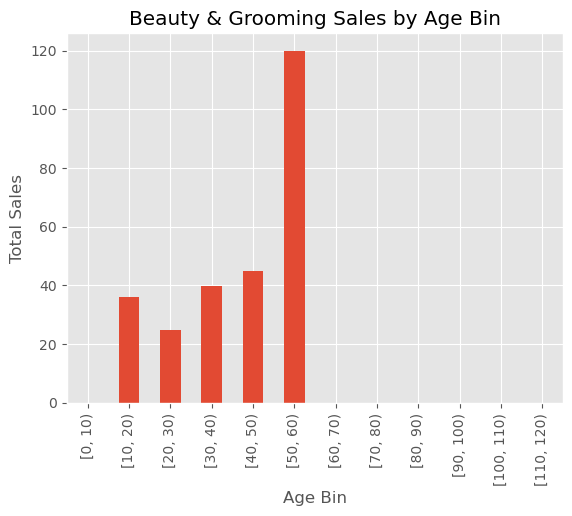

In [512]:
#Binning data with a width of 10 years, from 0 to 120 years of age
age_bins = [0, 18, 35, 50, 65, 120]
bin_labels = ['Children', 'Young Adults', 'Middle Aged', 'Seniors', 'Elderly']
beauty_grooming_df['age_bin'] = pd.cut(beauty_grooming_df['age'], bins=age_bins, labels=bin_labels, include_lowest=True)

age_bins = pd.interval_range(start=0, end=120, freq=10, closed='left')
beauty_grooming_df['age_bin'] = pd.cut(beauty_grooming_df['age'], bins=age_bins)

#Create a new column 'age_quantile_bin' with the age data divided into 5 equal-sized quantile bins, labeled 0 through 4
num_bins = 5
beauty_grooming_df['age_quantile_bin'] = pd.qcut(beauty_grooming_df['age'], q=num_bins, labels=np.arange(num_bins))

# Bar plot
beauty_grooming_df.groupby('age_bin')['value'].sum().plot(kind='bar')
plt.xlabel('Age Bin')
plt.ylabel('Total Sales')
plt.title('Beauty & Grooming Sales by Age Bin')
plt.show()

In [513]:
#Breaking down quarterly sales by age
# Convert 'order_date' to datetime format
beauty_grooming_df['order_date'] = pd.to_datetime(beauty_grooming_df['order_date'])

# Create a column for quarter
beauty_grooming_df['quarter'] = pd.PeriodIndex(beauty_grooming_df['order_date'], freq='Q')

# Filter for 'Beauty & Grooming' category
beauty_grooming_df = beauty_grooming_df[beauty_grooming_df['category'] == 'Beauty & Grooming']

# Binning data with a width of 10 years, from 0 to 120 years of age
age_bins = pd.interval_range(start=0, end=120, freq=10, closed='left')
beauty_grooming_df['age_bin'] = pd.cut(beauty_grooming_df['age'], bins=age_bins)

# Create a new column 'age_quantile_bin' with the age data divided into 5 equal-sized quantile bins, labeled 0 through 4
num_bins = 5
beauty_grooming_df['age_quantile_bin'] = pd.qcut(beauty_grooming_df['age'], q=num_bins, labels=np.arange(num_bins))

# Group by quarter, age bin, and age quantile bin, and sum the sales
sales_by_quarter_age_bin_quantile = beauty_grooming_df.groupby(['quarter', 'age_bin', 'age_quantile_bin'])['value'].sum().reset_index()

print(sales_by_quarter_age_bin_quantile)

    quarter     age_bin age_quantile_bin  value
0    2020Q1     [0, 10)                0    0.0
1    2020Q1     [0, 10)                1    0.0
2    2020Q1     [0, 10)                2    0.0
3    2020Q1     [0, 10)                3    0.0
4    2020Q1     [0, 10)                4    0.0
..      ...         ...              ...    ...
115  2020Q2  [110, 120)                0    0.0
116  2020Q2  [110, 120)                1    0.0
117  2020Q2  [110, 120)                2    0.0
118  2020Q2  [110, 120)                3    0.0
119  2020Q2  [110, 120)                4    0.0

[120 rows x 4 columns]


/var/folders/dr/t9cgnvgd661_5ywrpr94qp3w0000gn/T/ipykernel_12569/2222218644.py:20: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/var/folders/dr/t9cgnvgd661_5ywrpr94qp3w0000gn/T/ipykernel_12569/1528550731.py:15: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



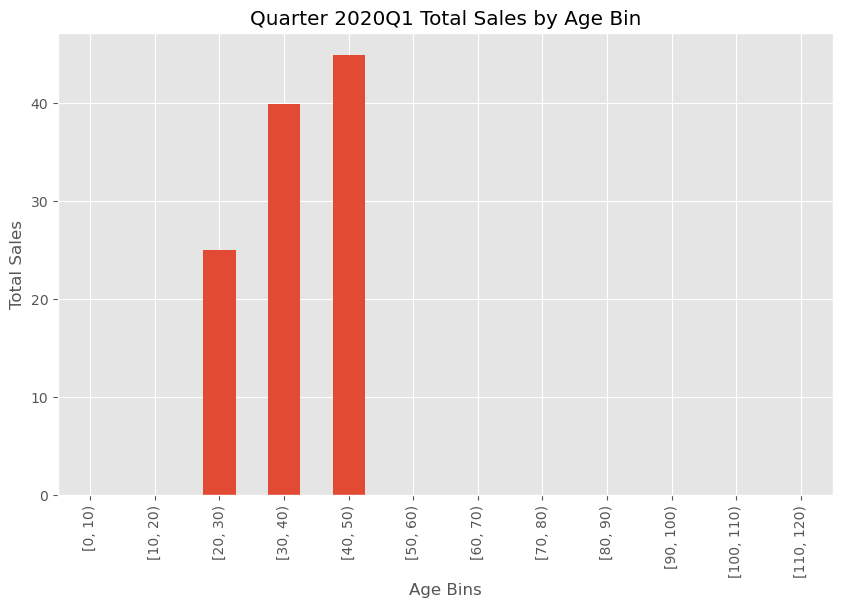

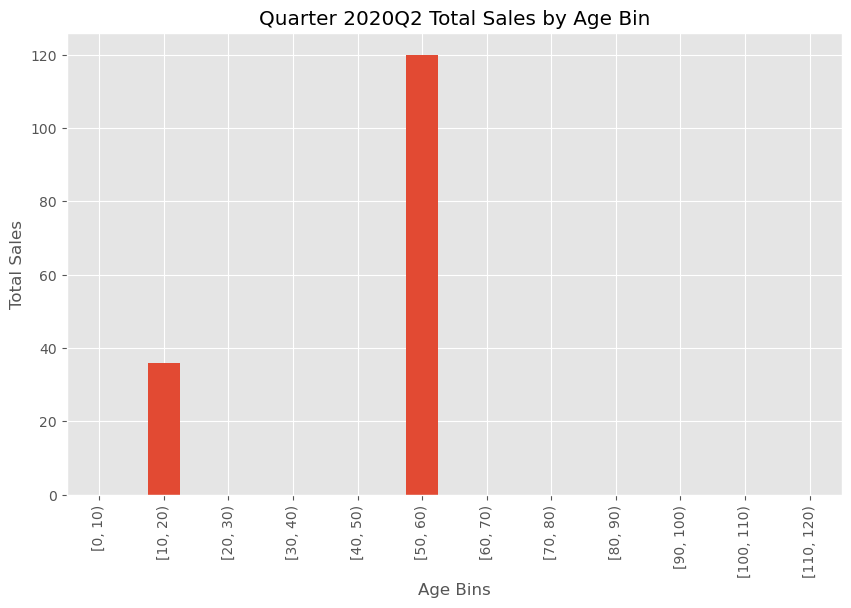

"\nAnalysis:\n\nAge Bin Contribution: Across all quarters, the age bin '(30.0, 40.0]' (likely representing ages between 30 and 40 years) \nconsistently has the highest total sales. \nThis suggests that this age group is the most significant contributor to the 'Beauty & Grooming' category sales.\n\nSeasonal Variations: There appear to be noticeable seasonal variations in total sales for certain age bins. \nFor example, the age bin '(20.0, 30.0]' (likely representing ages between 20 and 30 years) has higher total sales in Q3 \n(likely representing the third quarter of the year) compared to other quarters. \nThis could be due to factors such as seasonal trends, promotional campaigns, or changes in consumer behavior during specific times of the year.\nCovid could have been the factor for the changes in sales for Q3. \n\nAge Group Trends: Some age bins exhibit relatively consistent total sales across quarters, while others show more fluctuations. \nFor instance, the age bin '(40.0, 50.0]' (

In [514]:
# Convert 'order_date' to datetime format
beauty_grooming_df['order_date'] = pd.to_datetime(beauty_grooming_df['order_date'])

# Create a column for quarter
beauty_grooming_df['quarter'] = beauty_grooming_df['order_date'].dt.to_period('Q')

# Filter for 'Beauty & Grooming' category
beauty_grooming_df = beauty_grooming_df[beauty_grooming_df['category'] == 'Beauty & Grooming']

# Binning data with a width of 10 years, from 0 to 120 years of age
age_bins = pd.interval_range(start=0, end=120, freq=10, closed='left')
beauty_grooming_df['age_bin'] = pd.cut(beauty_grooming_df['age'], bins=age_bins)

# Group by quarter and age bin, and sum the sales
sales_by_quarter_age_bin = beauty_grooming_df.groupby(['quarter', 'age_bin'])['value'].sum().reset_index()

# Set global matplotlib style if desired, for example 'ggplot':
plt.style.use('ggplot')

for quarter, quarter_data in sales_by_quarter_age_bin.groupby('quarter'):
    plt.figure(figsize=(10, 6))
    quarter_data.set_index('age_bin')['value'].plot(kind='bar', figsize=(10, 6), title=f'Quarter {quarter} Total Sales by Age Bin')
    plt.ylabel('Total Sales')
    plt.xlabel('Age Bins')
    plt.show()

'''
Analysis:

Age Bin Contribution: Across all quarters, the age bin '(30.0, 40.0]' (likely representing ages between 30 and 40 years) 
consistently has the highest total sales. 
This suggests that this age group is the most significant contributor to the 'Beauty & Grooming' category sales.

Seasonal Variations: There appear to be noticeable seasonal variations in total sales for certain age bins. 
For example, the age bin '(20.0, 30.0]' (likely representing ages between 20 and 30 years) has higher total sales in Q3 
(likely representing the third quarter of the year) compared to other quarters. 
This could be due to factors such as seasonal trends, promotional campaigns, or changes in consumer behavior during specific times of the year.
Covid could have been the factor for the changes in sales for Q3. 

Age Group Trends: Some age bins exhibit relatively consistent total sales across quarters, while others show more fluctuations. 
For instance, the age bin '(40.0, 50.0]' (likely representing ages between 40 and 50 years) has relatively stable total sales across all quarters, 
suggesting a consistent demand from this age group throughout the year.

Low Sales Age Groups: The age bins '(0.0, 10.0]' (likely representing ages between 0 and 10 years) and '(110.0, 120.0]' 
(likely representing ages between 110 and 120 years) consistently have the lowest total sales across all quarters. 
This could be due to the nature of the 'Beauty & Grooming' category, which may not be as relevant or appealing to these age groups.

Potential Outliers: In some quarters, there may be age bins with unexpectedly high or low total sales compared to the overall trend. 
These could be potential outliers or anomalies in the data, which may warrant further investigation to understand the underlying reasons.
'''

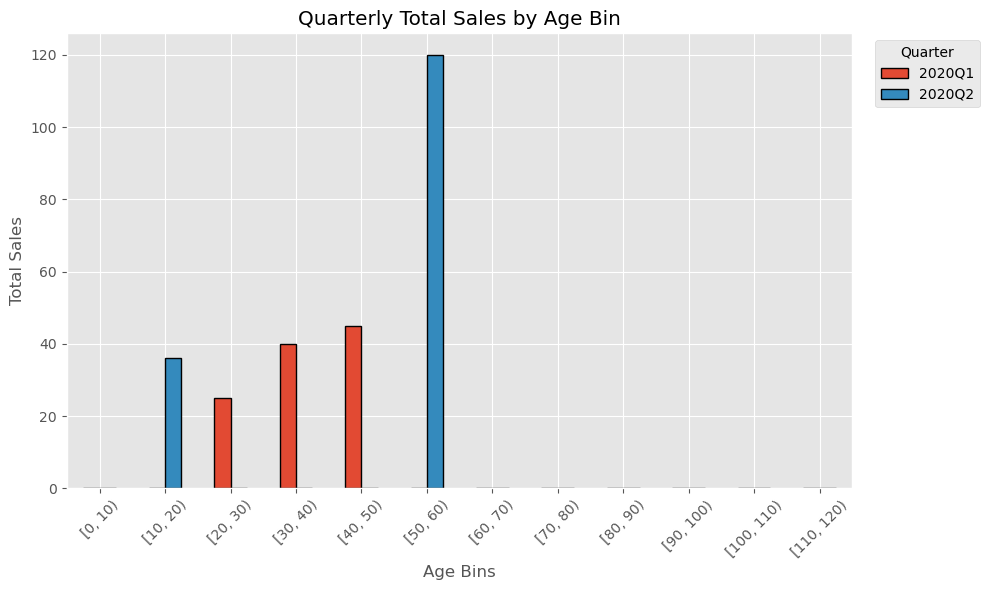

"\nAnalysis:\n\nIn this output visual:\nBars: Each bar represents the total sales for a specific age bin within a quarter. \nThe height of the bars varies, indicating different total sales values for different age bin and quarter combinations.\n\nX-axis: The x-axis displays the age bin ranges, such as '(0.0, 10.0]', '(10.0, 20.0]', '(20.0, 30.0]', and so on. \nThese labels represent the age ranges in years.\n\nY-axis: The y-axis represents the total sales value. \nThe higher the bar, the higher the total sales for that particular age bin and quarter combination.\n\nColors: There are four distinct colors in the bars, representing the four different quarters present in the data.\n\nLegend: The legend in the top-left corner shows the mapping between the colors and the corresponding quarters. \nFor example, the light blue color represents 'Q1', green represents 'Q2', orange represents 'Q3', and purple represents 'Q4'.\n\nBy analyzing this visual, you can make the following observations:\nT

In [515]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Pivot the data to create a wide format suitable for dot plot
dot_plot_data = sales_by_quarter_age_bin.pivot(index='age_bin', columns='quarter', values='value')

# Plot the dot plot
dot_plot_data.plot(kind='bar', ax=ax, edgecolor='black', linewidth=1)

# Set chart title and axis labels
ax.set_title('Quarterly Total Sales by Age Bin')
ax.set_xlabel('Age Bins')
ax.set_ylabel('Total Sales')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add legend
ax.legend(dot_plot_data.columns, title='Quarter', bbox_to_anchor=(1.02, 1), loc='upper left')

# Display the chart
plt.tight_layout()
plt.show()

'''
Analysis:

In this output visual:
Bars: Each bar represents the total sales for a specific age bin within a quarter. 
The height of the bars varies, indicating different total sales values for different age bin and quarter combinations.

X-axis: The x-axis displays the age bin ranges, such as '(0.0, 10.0]', '(10.0, 20.0]', '(20.0, 30.0]', and so on. 
These labels represent the age ranges in years.

Y-axis: The y-axis represents the total sales value. 
The higher the bar, the higher the total sales for that particular age bin and quarter combination.

Colors: There are four distinct colors in the bars, representing the four different quarters present in the data.

Legend: The legend in the top-left corner shows the mapping between the colors and the corresponding quarters. 
For example, the light blue color represents 'Q1', green represents 'Q2', orange represents 'Q3', and purple represents 'Q4'.

By analyzing this visual, you can make the following observations:
The age bin '(30.0, 40.0]' (likely representing ages between 30 and 40 years) has the highest total sales 
across all quarters, as indicated by the tallest bars in all colors.
The age bin '(0.0, 10.0]' (likely representing ages between 0 and 10 years) has the lowest total sales across
 all quarters, as indicated by the shortest bars in all colors.
For most age bins, the total sales seem to be highest in 'Q3' (orange bars) and lowest in 'Q1' (light blue bars), 
suggesting potential seasonal variations in sales.
There are some age bins where the total sales are relatively consistent across quarters, such as '(20.0, 30.0]' and '(40.0, 50.0]'.
Overall, this visual allows you to compare the total sales across different age groups (age bins) 
and identify which age groups contribute the most or least to the total sales in each quarter. 
It also helps you spot any potential trends or patterns in sales across different quarters for specific age groups.'''

In [516]:
entertainment_df = main_df[main_df["category"] == "Entertainment"]

In [517]:
entertainment_df.head()

order_id  order_date          status  item_id                  sku  \
163  100370316  21/11/2020        canceled   599491  ENTECO59D4D8FDDD355   
164  100370598  21/11/2020        canceled   599812  ENTNOB59D5C80A40401   
175  100447999  01/03/2021        canceled   735134  ENTSON5A5EDCB3952D6   
178  100448717  01/03/2021        canceled   736561  ENTLYN5A58C7EE69DDA   
281  100373715  01/12/2020  order_refunded   604811  ENTCAN59D4D8FA297C0   

     qty_ordered   price   value  discount_amount   total  ... Sign in date  \
163            2  2812.5  2812.5              0.0  2812.5  ...   12/22/2005   
164            2  1690.0  1690.0              0.0  1690.0  ...   12/22/2005   
175            3   587.0  1174.0            300.0   874.0  ...   12/22/2005   
178            3    56.8   113.6              0.0   113.6  ...   12/22/2005   
281            2  3842.0  3842.0              0.0  3842.0  ...   12/08/1999   

       Phone No.     Place Name     County          City State    Zip Region  \
163  228-450-0931          Drew  Sunflower          Drew    MS  38737  South   
164  228-450-0931          Drew  Sunflower          Drew    MS  38737  South   
175  228-450-0931          Drew  Sunflower          Drew    MS  38737  South   
178  228-450-0931          Drew  Sunflower          Drew    MS  38737  South   
281  225-428-0080  Lake Charles  Calcasieu  Lake Charles    LA  70629  South   

    User Name Discount_Percent  
163  lxblount         0.000000  
164  lxblount         0.000000  
175  lxblount        25.553663  
178  lxblount         0.000000  
281   sbroach         0.000000  

[5 rows x 35 columns]

In [518]:
entertainment_df.shape

(17352, 35)

In [519]:
# Andy's Part Demographics 

# Group by 'Category' and 'Product' and count occurrences
count_df = main_df.groupby(['Gender', 'category']).size().reset_index(name='Counts')
print(count_df)

   Gender            category  Counts
0       F          Appliances   16586
1       F   Beauty & Grooming    8959
2       F               Books     377
3       F           Computing    3888
4       F       Entertainment    8676
5       F     Health & Sports    2872
6       F       Home & Living    7014
7       F         Kids & Baby    3306
8       F       Men's Fashion   20150
9       F   Mobiles & Tablets   30963
10      F              Others   12340
11      F  School & Education     533
12      F             Soghaat    3721
13      F          Superstore    7077
14      F     Women's Fashion   13746
15      M          Appliances   16448
16      M   Beauty & Grooming    8940
17      M               Books     437
18      M           Computing    4222
19      M       Entertainment    8676
20      M     Health & Sports    5549
21      M       Home & Living    6976
22      M         Kids & Baby    3186
23      M       Men's Fashion   20563
24      M   Mobiles & Tablets   30798
25      M   

In [520]:
count_df_F = count_df.loc[count_df["Gender"]=="F"]
count_df_F

Gender            category  Counts
0       F          Appliances   16586
1       F   Beauty & Grooming    8959
2       F               Books     377
3       F           Computing    3888
4       F       Entertainment    8676
5       F     Health & Sports    2872
6       F       Home & Living    7014
7       F         Kids & Baby    3306
8       F       Men's Fashion   20150
9       F   Mobiles & Tablets   30963
10      F              Others   12340
11      F  School & Education     533
12      F             Soghaat    3721
13      F          Superstore    7077
14      F     Women's Fashion   13746

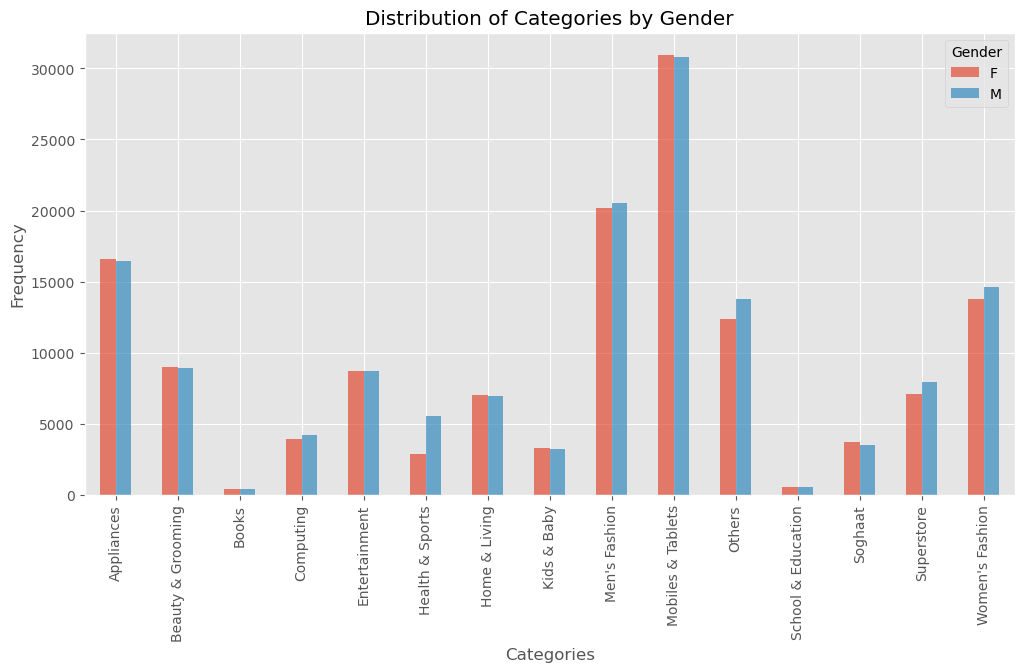

In [521]:
count_df = main_df.groupby(['category', 'Gender']).size().unstack(fill_value=0)
count_df.plot(kind='bar', alpha=0.7, figsize=(12, 6))

plt.title('Distribution of Categories by Gender')

plt.xlabel('Categories')

plt.ylabel('Frequency')

plt.show()

# ax = count_df[['Gender', 'category']].plot.hist(bins=30, alpha=0.7, figsize=(12, 6))

# Adding titles and labels
# ax.set_title('Histogram of Two Variables')
# ax.set_xlabel('Value')
# ax.set_ylabel('Frequency')

# Display the plot
plt.show()

/var/folders/dr/t9cgnvgd661_5ywrpr94qp3w0000gn/T/ipykernel_12569/1463117710.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



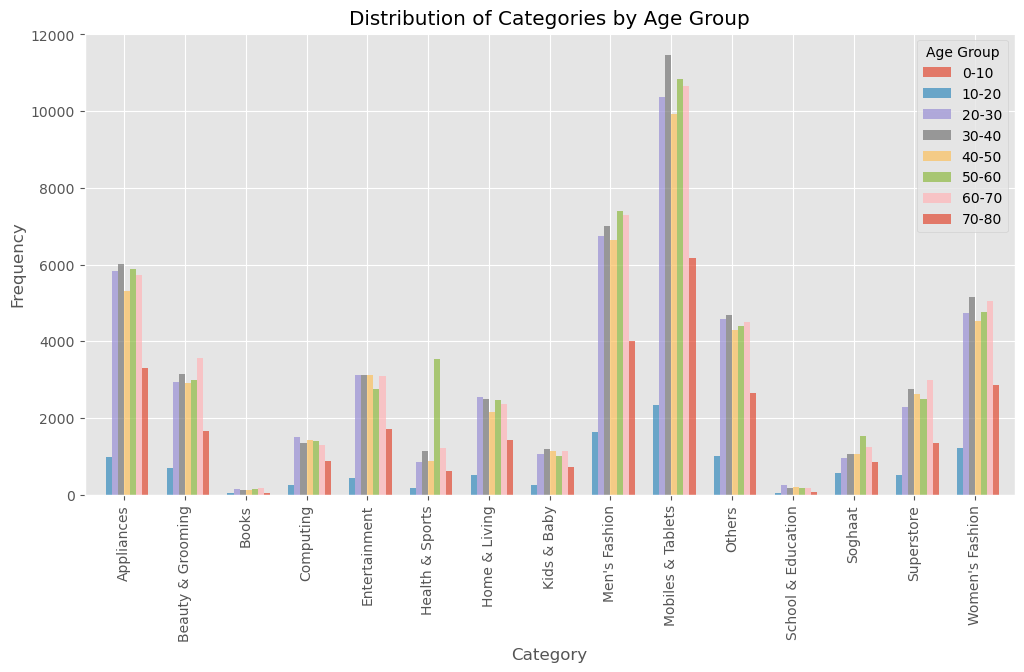

In [522]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]

age_labels = ["0-10","10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80"]

main_df['Age Group'] = pd.cut(main_df['age'], bins=age_bins, labels=age_labels, right=False)

count_df = main_df.groupby(['category', 'Age Group']).size().unstack(fill_value=0)

count_df.plot(kind='bar', alpha=0.7, figsize=(12, 6), width=0.8)

plt.title('Distribution of Categories by Age Group')

plt.xlabel('Category')

plt.ylabel('Frequency')

plt.show()


# ax = count_df[['Gender', 'category']].plot.hist(bins=30, alpha=0.7, figsize=(12, 6))

# Adding titles and labels
# ax.set_title('Histogram of Two Variables')
# ax.set_xlabel('Value')
# ax.set_ylabel('Frequency')

In [523]:
# JMARI CODE SECTION

In [524]:
# Reading the CSV file and storing data in a DataFrame
main_df = pd.read_csv('Resources/Amazon Sales FY2020-21.csv')

/var/folders/dr/t9cgnvgd661_5ywrpr94qp3w0000gn/T/ipykernel_12569/3105836412.py:2: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



In [525]:
# Reviewing DataFrame columns
print(main_df.columns)

# Data Cleaning and Preparation
# Drop irrelevant columns
columns_to_drop = ['Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'E Mail', 'Sign in date', 'Phone No. ', 'Place Name', 'County', 'City', 'State', 'Zip', 'Region', 'User Name', 'ref_num']
main_df.drop(columns_to_drop, axis=1, inplace=True)

Index(['order_id', 'order_date', 'status', 'item_id', 'sku', 'qty_ordered',
       'price', 'value', 'discount_amount', 'total', 'category',
       'payment_method', 'bi_st', 'cust_id', 'year', 'month', 'ref_num',
       'Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'Gender',
       'age', 'full_name', 'E Mail', 'Sign in date', 'Phone No. ',
       'Place Name', 'County', 'City', 'State', 'Zip', 'Region', 'User Name',
       'Discount_Percent'],
      dtype='object')


In [526]:
# Convert 'order_date' column to datetime format with correct date format
main_df['order_date'] = pd.to_datetime(main_df['order_date'], format='%d/%m/%Y')


In [527]:
# Drop rows with missing values
main_df.dropna(inplace=True)

# Sales Trend Over Time

In [528]:
# Aggregate total sales value by month
monthly_sales = main_df.resample('M', on='order_date')['total'].sum()

/var/folders/dr/t9cgnvgd661_5ywrpr94qp3w0000gn/T/ipykernel_12569/1088322165.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



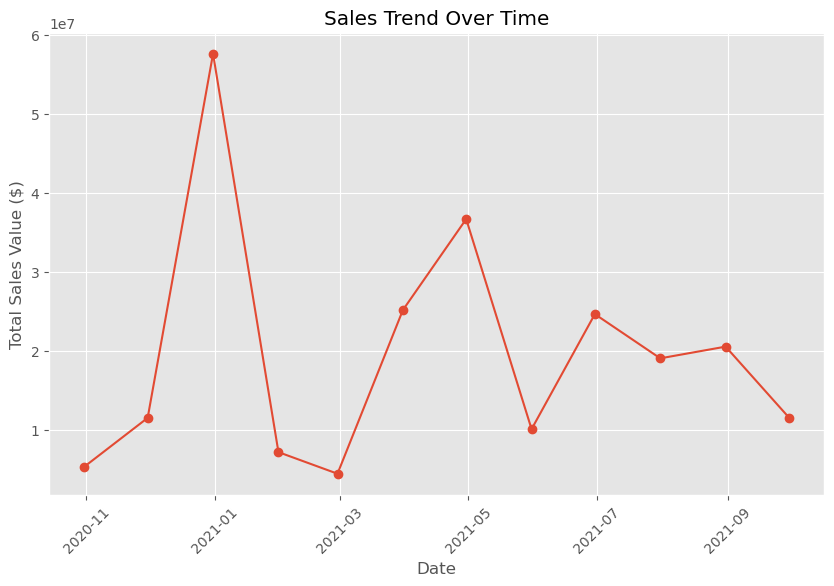

In [529]:
# Plotting sales trend over time
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Value ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Order Status Distribution

In [530]:
# Count the number of orders for each status
order_status_counts = main_df['status'].value_counts()

In [531]:
# Convert pandas Series to DataFrame for Plotly
order_status_counts_df = order_status_counts.reset_index()
order_status_counts_df.columns = ['Status', 'Count']


In [532]:
# Plot pie chart with Plotly Express
fig = px.pie(order_status_counts_df, values='Count', names='Status', title='Order Status Distribution',
             hover_data=['Count'], color_discrete_sequence=px.colors.qualitative.Set3)

# Increase the size of the pie chart
fig.update_layout(width=800, height=800)

# Show figure
fig.show()

# Top Selling Items

In [533]:
# Group by item_id and sum the quantity ordered to find top selling items
top_selling_items = main_df.groupby('item_id')['qty_ordered'].sum().nlargest(10)

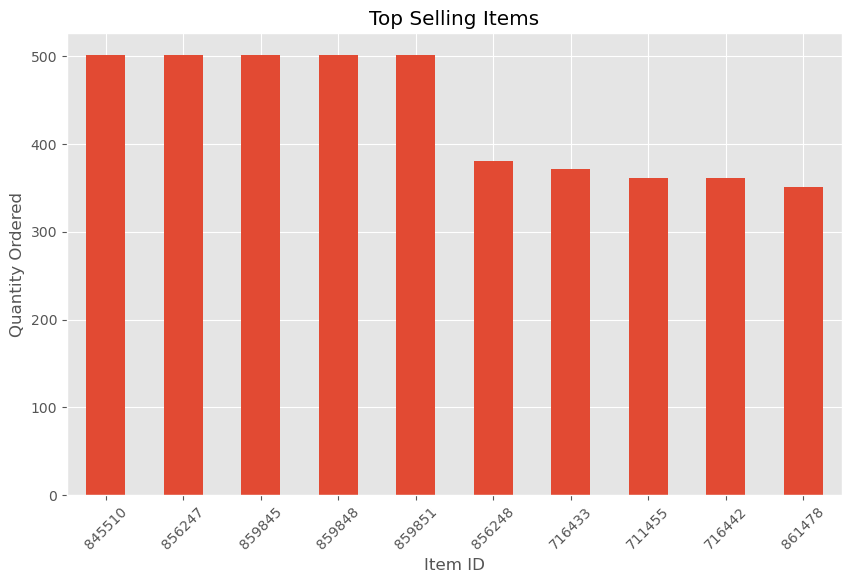

In [534]:
# Plotting top selling items
plt.figure(figsize=(10, 6))
top_selling_items.plot(kind='bar')
plt.title('Top Selling Items')
plt.xlabel('Item ID')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45)
plt.show()

# Sales by Category

In [535]:
# Group by category and sum total sales value
sales_by_category = main_df.groupby('category')['total'].sum()

In [536]:
# Convert pandas Series to DataFrame for Plotly
sales_by_category_df = sales_by_category.reset_index()
sales_by_category_df.columns = ['Category', 'Sales']


In [537]:
# Plot pie chart with Plotly
fig = px.pie(sales_by_category_df, values='Sales', names='Category', title='Sales by Category')

In [538]:
# Increase the size of the pie chart
fig.update_layout(width=800, height=800)

# Display label and percentage only on hover
fig.update_traces(hoverinfo='label+percent', textinfo='none')

fig.show()

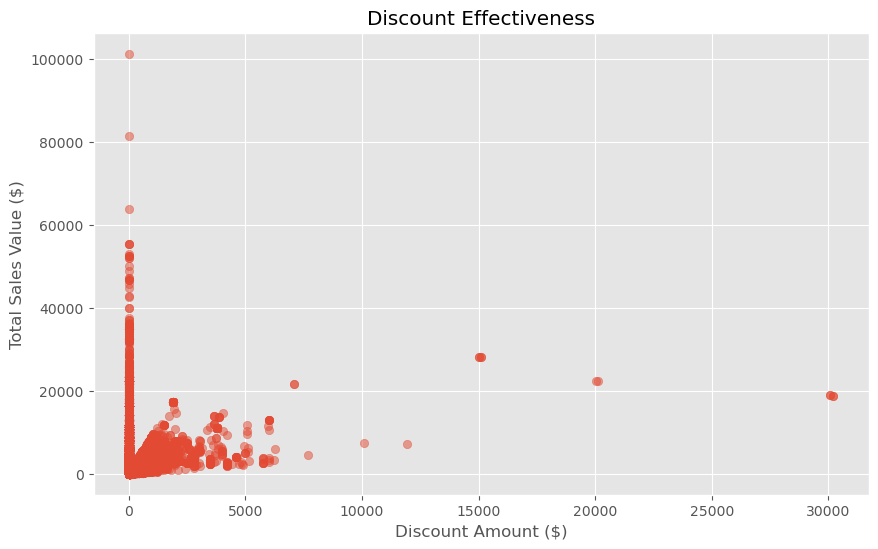

discount_amount          total
count    286392.000000  286392.000000
mean         70.039427     815.840507
std         256.880870    1983.580302
min           0.000000       0.000000
25%           0.000000      49.900000
50%           0.000000     149.800000
75%          18.383050     800.000000
max       30213.150000  101262.590000

In [539]:
# Discount Effectiveness
# Plotting scatter plot of discount amount vs. total sales value
plt.figure(figsize=(10, 6))
plt.scatter(main_df['discount_amount'], main_df['total'], alpha=0.5)
plt.title('Discount Effectiveness')
plt.xlabel('Discount Amount ($)')
plt.ylabel('Total Sales Value ($)')
plt.grid(True)
plt.show()

# Display numerical values as a table
display(main_df[['discount_amount', 'total']].describe())

# Discount Effectiveness

The mean discount amount is approximately $70, indicating that, on average, discounts are applied to orders. However, the median discount amount is $0, suggesting that a significant portion of orders do not have any discounts applied. The maximum discount amount is notably high at $30,213.15, showcasing instances of substantial discounts being offered. Concerning total sales, the mean is approximately $816, with a median of $149.80, implying a considerable variation in sales values across orders. Notably, the maximum total sales value exceeds $101,262.59.

Overall, while discounts are applied across orders, their effectiveness in driving sales is unclear from these summary statistics alone. The presence of substantial discounts and high sales values suggests that discounts may influence purchasing behavior positively. However, the prevalence of orders with no discounts and the substantial variability in sales values indicate that other factors beyond discounts, such as product demand, marketing strategies, and customer preferences, may also significantly impact sales. Therefore, determining whether increasing or decreasing discounts improves sales would require a more in-depth analysis, considering additional variables and potentially conducting experiments or A/B testing to assess the direct impact of discount variations on sales performance.

In [540]:
# Payment Method Preference
# Count the number of orders for each payment method
payment_method_counts = main_df['payment_method'].value_counts().reset_index()
payment_method_counts.columns = ['Payment Method', 'Count']

In [541]:
# Plotting payment method preference with Plotly Express
fig = px.pie(payment_method_counts, values='Count', names='Payment Method', title='Payment Method Preference',
             hover_data=['Count'], labels={'Count': 'Number of Orders'})

# Increase the size of the pie chart
fig.update_layout(width=800, height=800)

# Show figure
fig.show()

# Sales by Region

In [542]:
# Group by region and category, and sum total sales value
sales_by_region_category = main_df.groupby(['Region', 'category'])['total'].sum().reset_index()

KeyError: 'Region'

In [ ]:
# Calculate percentage of sales for each category within each region
sales_by_region_category['percentage'] = sales_by_region_category.groupby('Region')['total'].transform(lambda x: x / x.sum() * 100)

NameError: name 'sales_by_region_category' is not defined

In [ ]:
# Color code the categories
colors = px.colors.qualitative.Set3

In [ ]:
# Group by region and sum total sales value
sales_by_region = main_df.groupby(['Region', 'category'])['total'].sum().reset_index()

# Calculate percentage of sales for each category within each region
sales_by_region['percentage'] = sales_by_region.groupby('Region')['total'].transform(lambda x: x / x.sum() * 100)

# Sort the data by total sales value in descending order
sales_by_region = sales_by_region.sort_values(by=['Region', 'total'], ascending=[True, False])

# Color code the categories
colors = px.colors.qualitative.Set3

# Plotting sales by region with breakdown by category
fig = px.bar(sales_by_region, x='Region', y='total', color='category', 
             text='percentage', color_discrete_sequence=colors,
             labels={'total': 'Total Sales Value ($)', 'category': 'Category', 'percentage': 'Percentage of Sales (%)'})

# Add percentage value to hover information
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

# Customize layout
fig.update_layout(title='Sales by Region with Category Breakdown',
                  xaxis_title='Region',
                  yaxis_title='Total Sales Value ($)',
                  xaxis=dict(tickangle=45),
                  legend_title='Category',
                  width=1000,  # Adjust width as needed
                  height=600,  # Adjust height as needed
                  barmode='stack')  # Adjust to stack bars

# Show the plot
fig.show()



KeyError: 'Region'

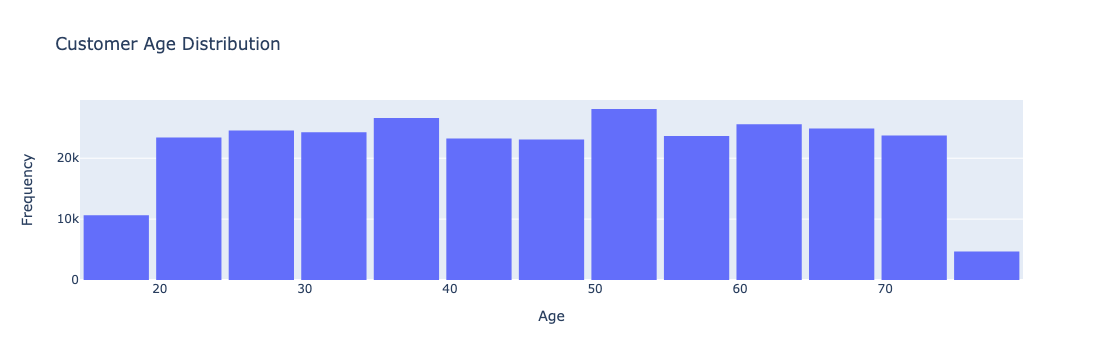

In [ ]:
# Customer Age Distribution
# Create an interactive histogram with Plotly
fig = px.histogram(main_df, x='age', nbins=20, title='Customer Age Distribution')
fig.update_layout(xaxis_title='Age', yaxis_title='Frequency', bargap=0.1)
fig.show()

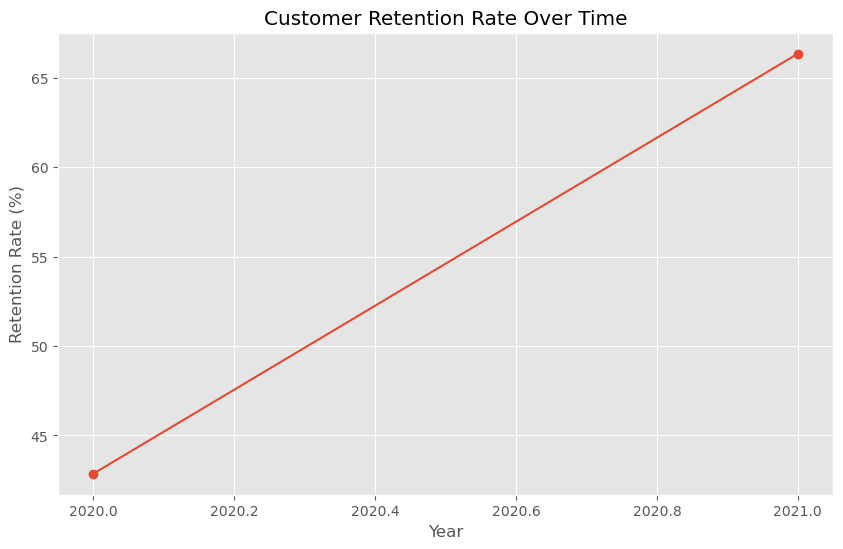

In [ ]:
# Customer Retention Rate

# Convert 'order_date' column to datetime with the correct format
main_df['order_date'] = pd.to_datetime(main_df['order_date'], format='%d/%m/%Y')

# Group by year and count unique customer IDs to calculate retention rate
customer_retention_rate = main_df.groupby(main_df['order_date'].dt.year)['cust_id'].nunique() / main_df['cust_id'].nunique() * 100

# Plotting customer retention rate over time
plt.figure(figsize=(10, 6))
plt.plot(customer_retention_rate.index, customer_retention_rate.values, marker='o')
plt.title('Customer Retention Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Retention Rate (%)')
plt.grid(True)
plt.show()


In [ ]:
# Average Order Value Over Time

# Aggregate average order value by month
avg_order_value = main_df.resample('M', on='order_date')['total'].mean()

/var/folders/sj/wsdg1vcn3x716j80gz8mlygh0000gn/T/ipykernel_7134/5363550.py:4: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [ ]:
# Calculate percentage change of average order value over time
percentage_change = avg_order_value.pct_change() * 100

In [ ]:
# Create an interactive line chart with Plotly
fig = go.Figure()

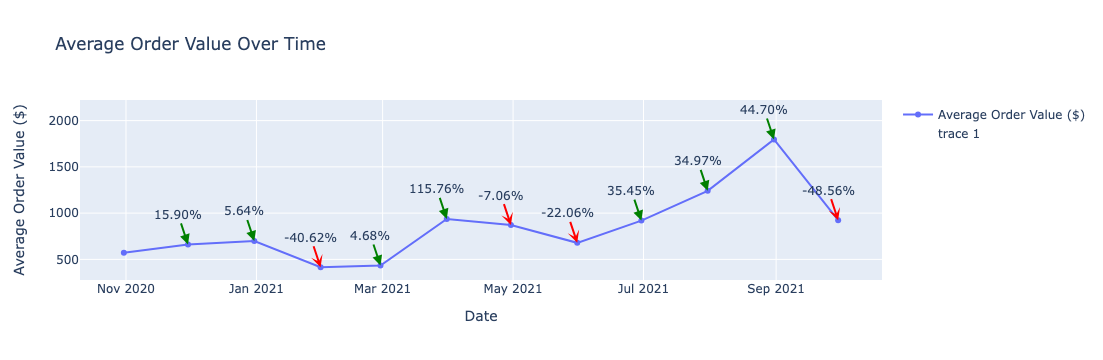

In [ ]:
# Add trace for the line chart
fig.add_trace(go.Scatter(x=avg_order_value.index, y=avg_order_value.values,
                         mode='lines+markers', name='Average Order Value ($)'))

# Add custom hover label with details and percentage change
hover_text = [f'Date: {date}<br>Average Order Value: ${value:.2f}<br>Percentage Change: {change:.2f}%'
              for date, value, change in zip(avg_order_value.index, avg_order_value.values, percentage_change)]
fig.add_trace(go.Scatter(x=avg_order_value.index, y=avg_order_value.values,
                         mode='markers', marker=dict(color='rgba(0,0,0,0)'),
                         hoverinfo='text', hovertext=hover_text))

# Update layout
fig.update_layout(title='Average Order Value Over Time',
                  xaxis_title='Date', yaxis_title='Average Order Value ($)',
                  hovermode='closest')

# Add annotations for percentage change with colored arrows
for i in range(1, len(avg_order_value)):
    if percentage_change.iloc[i] > 0:
        fig.add_annotation(x=avg_order_value.index[i], y=avg_order_value.values[i],
                           text=f'{percentage_change.iloc[i]:.2f}%', showarrow=True,
                           arrowhead=2, arrowsize=1, arrowwidth=2, arrowcolor='green')
    elif percentage_change.iloc[i] < 0:
        fig.add_annotation(x=avg_order_value.index[i], y=avg_order_value.values[i],
                           text=f'{percentage_change.iloc[i]:.2f}%', showarrow=True,
                           arrowhead=3, arrowsize=1, arrowwidth=2, arrowcolor='red')

# Show interactive chart
fig.show()



In [ ]:
# Correlation Analysis

# Exclude non-numeric columns from correlation analysis
numeric_columns = main_df.select_dtypes(include=[np.number])

In [ ]:
# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

In [ ]:
# Function to classify correlation strength
def classify_correlation(correlation):
    if correlation > 0.7:
        return 'High'
    elif correlation > 0.3:
        return 'Medium'
    else:
        return 'Low'


In [ ]:
# Create hover text for each cell in the heatmap
hover_text = []
for i in range(len(correlation_matrix.index)):
    row = correlation_matrix.iloc[i]
    hover_text.append([f'{col}: {correlation:.2f} ({classify_correlation(correlation)})' for col, correlation in zip(row.index, row)])


In [ ]:
# Create a heatmap trace
heatmap = go.Heatmap(z=correlation_matrix.values,
                     x=correlation_matrix.columns,
                     y=correlation_matrix.index,
                     hovertext=hover_text,
                     colorscale='viridis',
                     colorbar=dict(title='Correlation'))

In [ ]:
# Create a figure and add the heatmap trace
fig = go.Figure(data=heatmap)


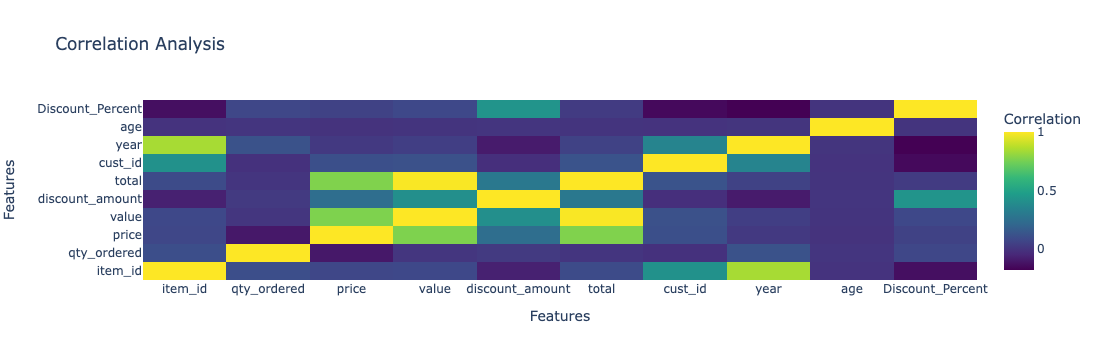

In [ ]:
# Update layout
fig.update_layout(title='Correlation Analysis',
                  xaxis=dict(title='Features'),
                  yaxis=dict(title='Features'))

# Show interactive chart
fig.show()

In [ ]:
# Sales Performance by Month/Year

# Convert 'month' to datetime
main_df['month'] = pd.to_datetime(main_df['month'], format='%b-%y')

In [ ]:
# Sort DataFrame by 'year' and 'month'
main_df = main_df.sort_values(by=['year', 'month'])

In [ ]:
# Sales Performance by Month/Year
sales_performance = main_df.groupby([main_df['year'], main_df['month']])['total'].sum()

In [ ]:
# Convert multi-index series to DataFrame for easier manipulation
sales_performance_df = sales_performance.unstack()

In [ ]:
# Create a dictionary to map month abbreviations to their indices
month_indices = {month_abbr: i for i, month_abbr in enumerate(calendar.month_abbr) if month_abbr}

In [ ]:
# Extract only the month abbreviations (MMM) from the column names
months = sales_performance_df.columns
months_sorted = sorted(months, key=lambda x: x.month)  # Sort by month (as Timestamp objects)

In [ ]:
# Reindex DataFrame with sorted months
sales_performance_df = sales_performance_df.reindex(columns=months_sorted)

In [ ]:
# Calculate percentage change
sales_performance_pct_change = sales_performance_df.pct_change(fill_method=None) * 100

In [ ]:
# Create hover text for each data point
hover_text = []
for col in sales_performance_df.columns:
    hover_text.append([f'Total Sales: ${value:.2f}<br>Percentage Change: {pct_change:.2f}%' 
                       for value, pct_change in zip(sales_performance_df[col], sales_performance_pct_change[col])])

In [ ]:
# Extract year and month from the index
years = [str(year) for year in sales_performance_df.index]

In [ ]:
# Create a range of dates covering all months and years
date_range = pd.date_range(start=min(main_df['month']), end=max(main_df['month']), freq='MS')

In [ ]:
# Create traces for each year
data = []
for year_index, year in enumerate(years):
    trace = go.Bar(
        x=date_range,
        y=sales_performance_df.iloc[year_index],
        hovertext=hover_text[year_index],
        name=year
    )
    data.append(trace)

In [ ]:
# Create layout
layout = go.Layout(
    title='Sales Performance by Month/Year',
    xaxis=dict(title='Month'),
    yaxis=dict(title='Total Sales Value ($)'),
    hovermode='closest'
)

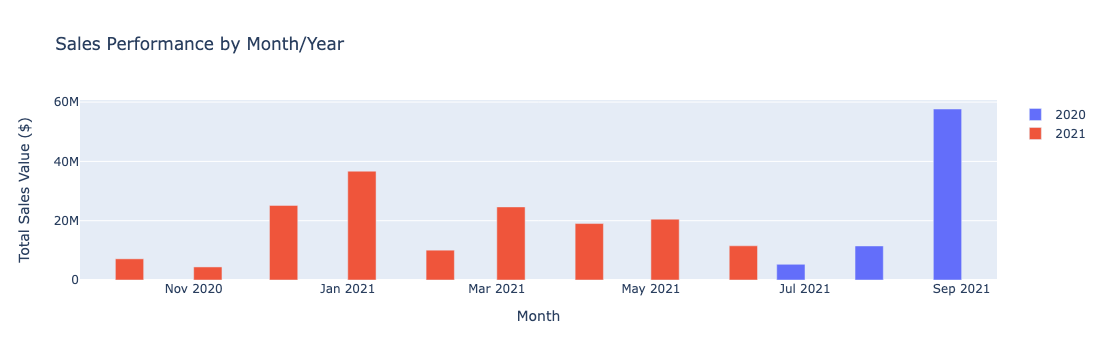

In [ ]:
# Create figure
fig = go.Figure(data=data, layout=layout)

# Show interactive chart
fig.show()

/var/folders/sj/wsdg1vcn3x716j80gz8mlygh0000gn/T/ipykernel_7134/319509743.py:3: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



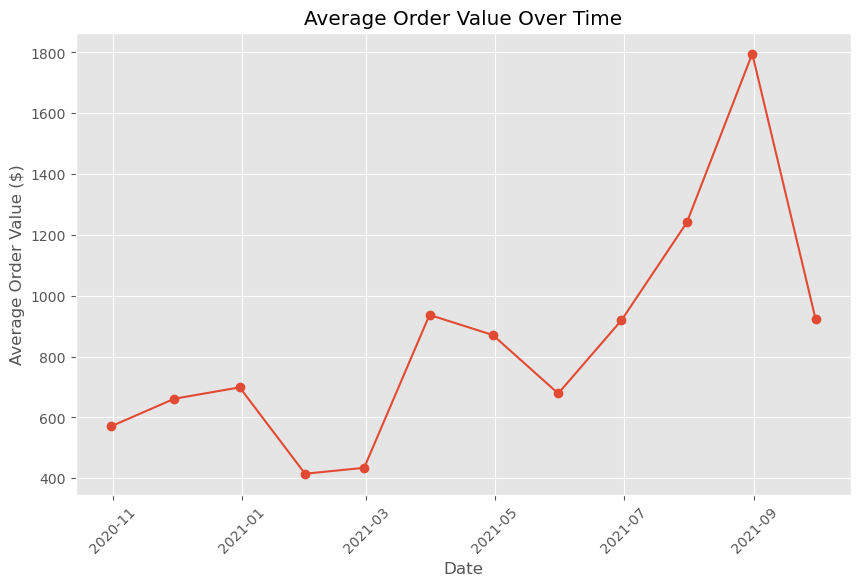

In [ ]:
# Average Order Value Over Time
# Aggregate average order value by month
avg_order_value = main_df.resample('M', on='order_date')['total'].mean()

# Plotting average order value over time
plt.figure(figsize=(10, 6))
plt.plot(avg_order_value.index, avg_order_value.values, marker='o')
plt.title('Average Order Value Over Time')
plt.xlabel('Date')
plt.ylabel('Average Order Value ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


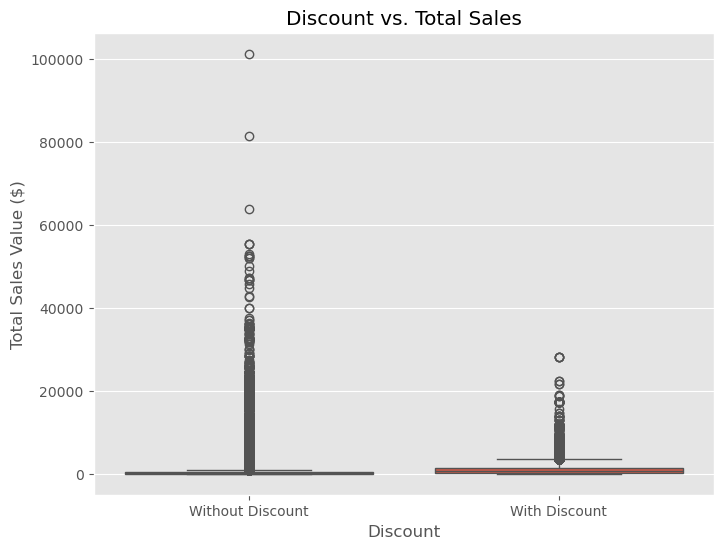

In [ ]:
# Discount vs. Total Sales
# Plotting box plot comparing total sales for orders with and without discounts
plt.figure(figsize=(8, 6))
sns.boxplot(x=main_df['discount_amount'].apply(lambda x: 'With Discount' if x > 0 else 'Without Discount'), y=main_df['total'])
plt.title('Discount vs. Total Sales')
plt.xlabel('Discount')
plt.ylabel('Total Sales Value ($)')
plt.show()

In [ ]:
#Shephali's Part - Product Category Analysis by Region

In [ ]:
# Reading the CSV file and storing data in a DataFrame
main_df = pd.read_csv('Resources/Amazon Sales FY2020-21.csv')

/var/folders/sj/wsdg1vcn3x716j80gz8mlygh0000gn/T/ipykernel_7134/3105836412.py:2: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
# Reviewing DataFrame columns
print(main_df.columns)

Index(['order_id', 'order_date', 'status', 'item_id', 'sku', 'qty_ordered',
       'price', 'value', 'discount_amount', 'total', 'category',
       'payment_method', 'bi_st', 'cust_id', 'year', 'month', 'ref_num',
       'Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'Gender',
       'age', 'full_name', 'E Mail', 'Sign in date', 'Phone No. ',
       'Place Name', 'County', 'City', 'State', 'Zip', 'Region', 'User Name',
       'Discount_Percent'],
      dtype='object')


In [ ]:
# Counting the number of non-null values in each column of the DataFrame 'main_df'.
main_df.count()

order_id            286392
order_date          286392
status              286392
item_id             286392
sku                 286392
qty_ordered         286392
price               286392
value               286392
discount_amount     286392
total               286392
category            286392
payment_method      286392
bi_st               286392
cust_id             286392
year                286392
month               286392
ref_num             286392
Name Prefix         286392
First Name          286392
Middle Initial      286392
Last Name           286392
Gender              286392
age                 286392
full_name           286392
E Mail              286392
Sign in date        286392
Phone No.           286392
Place Name          286392
County              286392
City                286392
State               286392
Zip                 286392
Region              286392
User Name           286392
Discount_Percent    286392
dtype: int64

In [ ]:
# Data Cleaning and Preparation
# Drop irrelevant columns
columns_to_drop = ['Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'E Mail', 'Sign in date', 'Phone No. ', 'Place Name', 'County', 'User Name', 'ref_num']
main_df.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
# Drop rows with missing values
main_df.dropna(inplace=True)

In [ ]:
main_df.count()

order_id            286392
order_date          286392
status              286392
item_id             286392
sku                 286392
qty_ordered         286392
price               286392
value               286392
discount_amount     286392
total               286392
category            286392
payment_method      286392
bi_st               286392
cust_id             286392
year                286392
month               286392
Gender              286392
age                 286392
full_name           286392
City                286392
State               286392
Zip                 286392
Region              286392
Discount_Percent    286392
dtype: int64

In [ ]:
Category_by_Region_df = main_df.groupby(['Region', 'category']).size().unstack(fill_value=0)
print(Category_by_Region_df)

category   Appliances  Beauty & Grooming  Books  Computing  Entertainment  \
Region                                                                      
Midwest          8983               5044    180       2188           4715   
Northeast        5574               3297    144       1449           2946   
South           12489               6332    317       3081           6205   
West             5988               3226    173       1392           3486   

category   Health & Sports  Home & Living  Kids & Baby  Men's Fashion  \
Region                                                                  
Midwest               4159           3735         1803          11277   
Northeast              940           2515         1226           7294   
South                 2307           5238         2313          14707   
West                  1015           2502         1150           7435   

category   Mobiles & Tablets  Others  School & Education  Soghaat  Superstore  \
Region           

In [ ]:
Category_by_Region_df = main_df.groupby(['Region', 'category']).size()
print(Category_by_Region_df)

Region     category          
Midwest    Appliances             8983
           Beauty & Grooming      5044
           Books                   180
           Computing              2188
           Entertainment          4715
           Health & Sports        4159
           Home & Living          3735
           Kids & Baby            1803
           Men's Fashion         11277
           Mobiles & Tablets     16592
           Others                 7518
           School & Education      293
           Soghaat                2128
           Superstore             4973
           Women's Fashion        7711
Northeast  Appliances             5574
           Beauty & Grooming      3297
           Books                   144
           Computing              1449
           Entertainment          2946
           Health & Sports         940
           Home & Living          2515
           Kids & Baby            1226
           Men's Fashion          7294
           Mobiles & Tablets     1

In [ ]:
#Top Sales Region by Quantity sold
Most_Sales_byRegion = main_df.groupby('Region')['qty_ordered'].sum().nlargest()
print(Most_Sales_byRegion)

Region
South        303141
Midwest      253267
West         155714
Northeast    150289
Name: qty_ordered, dtype: int64


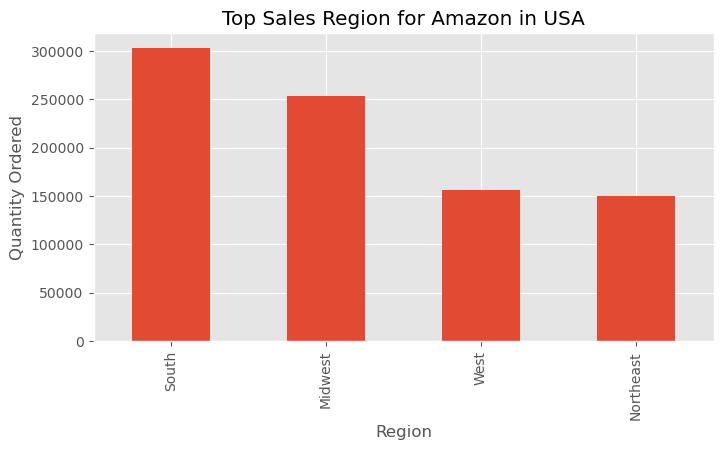

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(8, 4))
Most_Sales_byRegion.plot(kind='bar')
plt.title('Top Sales Region for Amazon in USA')
plt.xlabel('Region')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Top Selling Categories by Quantity ordered/sold
top_categories_df = main_df.groupby('category')['qty_ordered'].sum().nlargest(20)
print(top_categories_df)

category
Mobiles & Tablets     135041
Others                109266
Men's Fashion         102374
Superstore            101964
Appliances             82435
Women's Fashion        78944
Beauty & Grooming      71122
Home & Living          41830
Entertainment          34788
Health & Sports        28611
Soghaat                28281
Kids & Baby            20655
Computing              20506
School & Education      4431
Books                   2163
Name: qty_ordered, dtype: int64


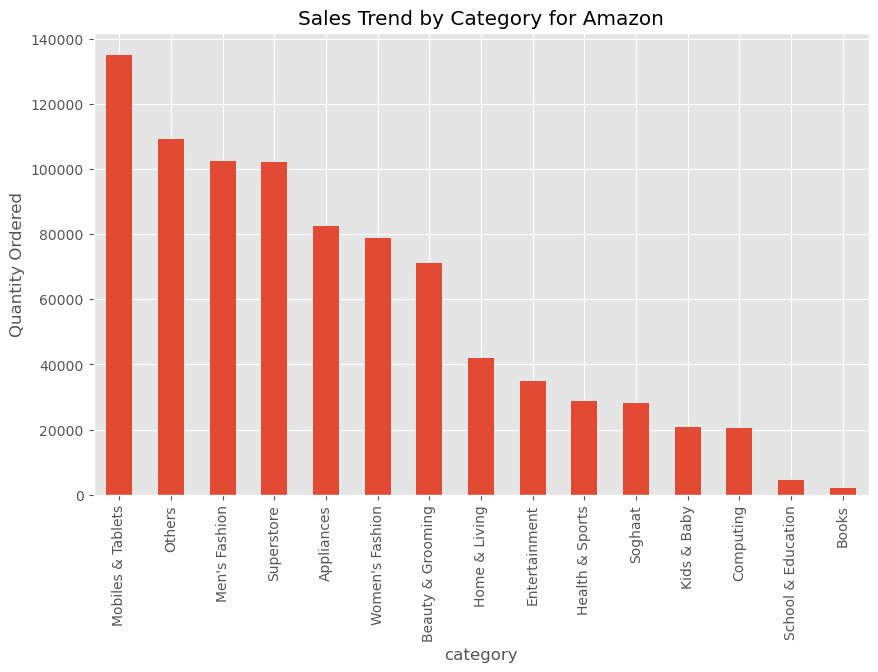

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
top_categories_df.plot(kind='bar')
plt.title('Sales Trend by Category for Amazon')
plt.xlabel('category')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=90)
plt.show()

In [ ]:
##Mobile & Tablets category sold the most whereas Books sold the least across the US.

In [ ]:
#Qty sold by Region and C
QtySold_by_Region_Category = main_df.groupby(['Region', 'category'])['qty_ordered'].sum().reset_index()
print(QtySold_by_Region_Category)

       Region            category  qty_ordered
0     Midwest          Appliances        22889
1     Midwest   Beauty & Grooming        19428
2     Midwest               Books          495
3     Midwest           Computing         5417
4     Midwest       Entertainment         9351
5     Midwest     Health & Sports        12338
6     Midwest       Home & Living        11685
7     Midwest         Kids & Baby         5588
8     Midwest       Men's Fashion        29122
9     Midwest   Mobiles & Tablets        36484
10    Midwest              Others        34142
11    Midwest  School & Education         1162
12    Midwest             Soghaat         8453
13    Midwest          Superstore        35424
14    Midwest     Women's Fashion        21289
15  Northeast          Appliances        14110
16  Northeast   Beauty & Grooming        11968
17  Northeast               Books          378
18  Northeast           Computing         3547
19  Northeast       Entertainment         5936
20  Northeast

In [ ]:
#Sort Region and Category by Qty ordered
sorted = QtySold_by_Region_Category.sort_values(by="qty_ordered",ascending=False)
print(sorted)

       Region            category  qty_ordered
39      South   Mobiles & Tablets        50498
40      South              Others        37864
9     Midwest   Mobiles & Tablets        36484
38      South       Men's Fashion        36204
13    Midwest          Superstore        35424
10    Midwest              Others        34142
43      South          Superstore        31229
30      South          Appliances        30511
44      South     Women's Fashion        29357
8     Midwest       Men's Fashion        29122
54       West   Mobiles & Tablets        24378
31      South   Beauty & Grooming        24235
24  Northeast   Mobiles & Tablets        23681
0     Midwest          Appliances        22889
14    Midwest     Women's Fashion        21289
1     Midwest   Beauty & Grooming        19428
23  Northeast       Men's Fashion        18882
55       West              Others        18684
25  Northeast              Others        18576
58       West          Superstore        18223
53       West

/opt/anaconda3/envs/ai_dev/lib/python3.10/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



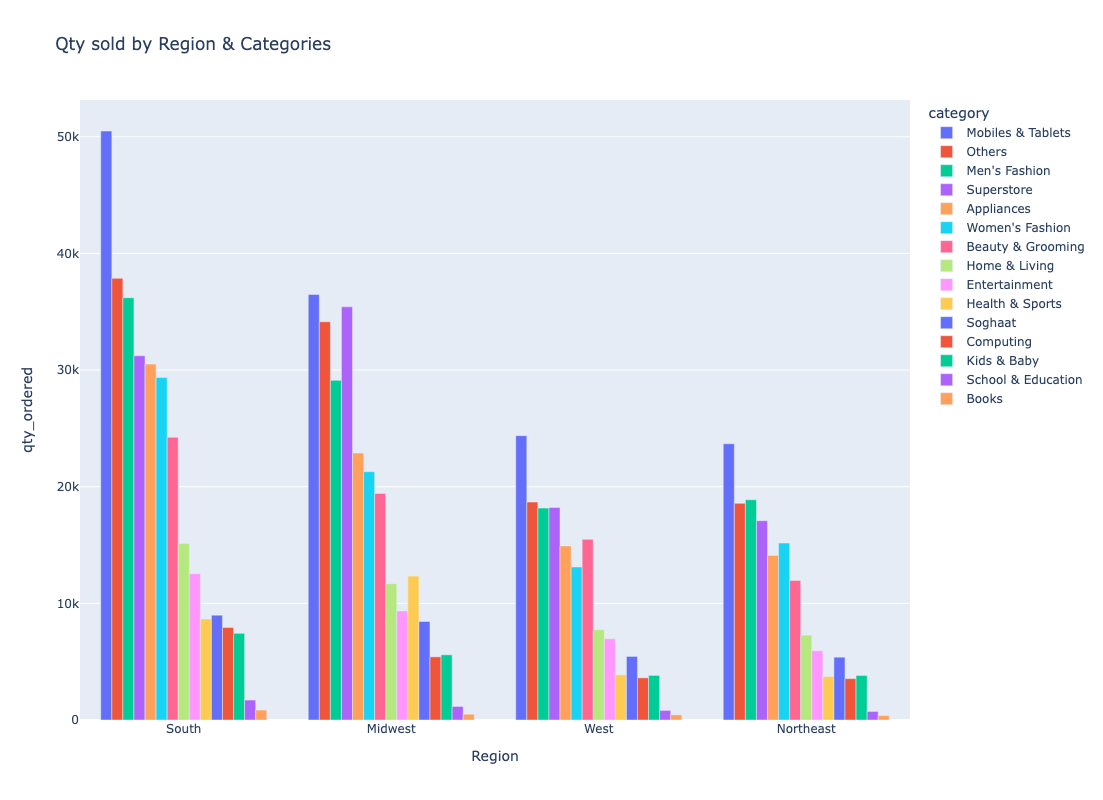

In [ ]:
# Plot bar chart with Plotly Express to denote Qty sold by Region and category
fig = px.bar(sorted, x='Region', y='qty_ordered', title='Qty sold by Region & Categories',
             hover_data=['qty_ordered'], color='category',barmode='group')

# Increase the size of the pie chart
fig.update_layout(width=1100, height=800)

# Show figure
fig.show()

In [ ]:
##This graph is an interactive graph. You can hover over each category over a region to see more details such as category, region and qty ordered.This graph gives quick view of all categories sold in all regions in one preview.

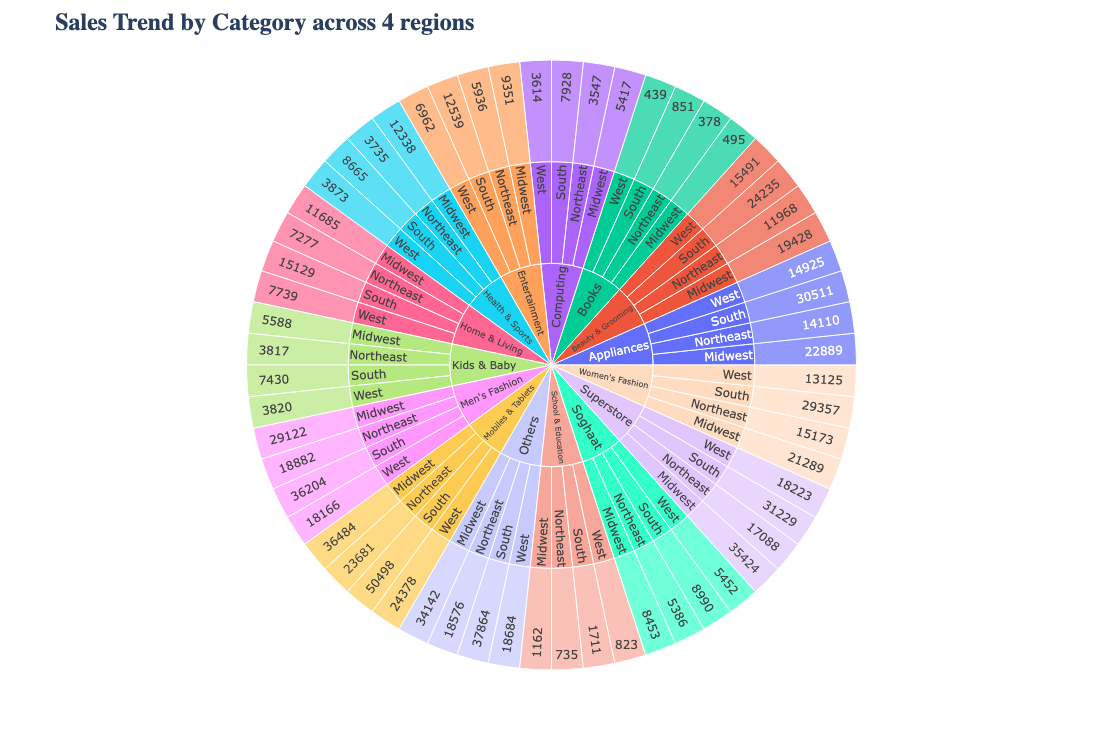

In [ ]:
# Plot Interactive sunburst chart with Plotly Express to denote Qty sold by category across regions
#(https://www.kaggle.com/code/desalegngeb/plotly-guide-customize-for-better-visualizations)

fig = px.sunburst(QtySold_by_Region_Category,
                  path=['category','Region', 'qty_ordered'])
fig.update_layout(title_text="<b>Sales Trend by Category across 4 regions<b>", 
                  titlefont={'size': 24, 'family':'Serif'},
                  width=750, 
                  height=750,
                 )
fig.show()

In [ ]:
##Category driven analysis: Above Interactive plot can be used to explore sales trend by Category to get/give further insight into which product is moving a the most and where thus should receive & maintain more inventory in that category. For example, Appliances & computing products sold the most in South, in comparison to other regions. Kids & Baby products boomed in South region whereas Health & Sports products moved the most in Midwest. Men's fashion products moved the most in Midwest, whereas Women's Fashion products moved the most in the South.  

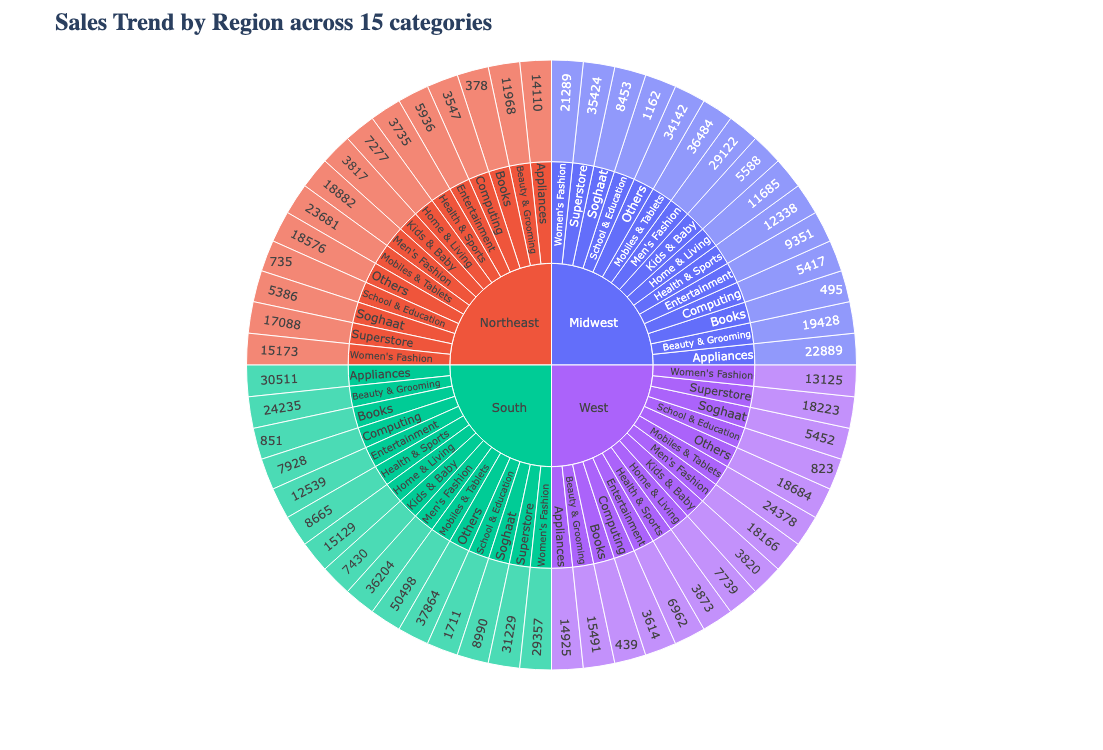

In [ ]:
# Plot Interactive sunburst chart with Plotly Express to denote Qty sold by Region across categories
#(https://www.kaggle.com/code/desalegngeb/plotly-guide-customize-for-better-visualizations)

fig = px.sunburst(QtySold_by_Region_Category,
                  path=['Region', 'category','qty_ordered'])
fig.update_layout(title_text="<b>Sales Trend by Region across 15 categories<b>", 
                  titlefont={'size': 24, 'family':'Serif'},
                  width=750, 
                  height=750,
                 )
fig.show()


In [ ]:
##Region driven analysis: Above Interactive plot can be used to explore sales trend by Region to get/give further insight into which region is moving a specific category of products the most thus should receive & maintain more inventory in that Region for the same. For example, Northeast region has high demand for Mobiles & Tablets but barely any demand for books. So a Distribution center managing stock and shipments for Northeast region (possibly located in northeast region for cheaper freight), should stock up accordingly. 

In [ ]:
#Mobile & Tablets Sales by Region

In [ ]:
#Mobile & Tablets Sales by Region
Mobile_Category_df = QtySold_by_Region_Category.loc[QtySold_by_Region_Category["category"]=="Mobiles & Tablets"]
print(Mobile_Category_df)

       Region           category  qty_ordered
9     Midwest  Mobiles & Tablets        36484
24  Northeast  Mobiles & Tablets        23681
39      South  Mobiles & Tablets        50498
54       West  Mobiles & Tablets        24378


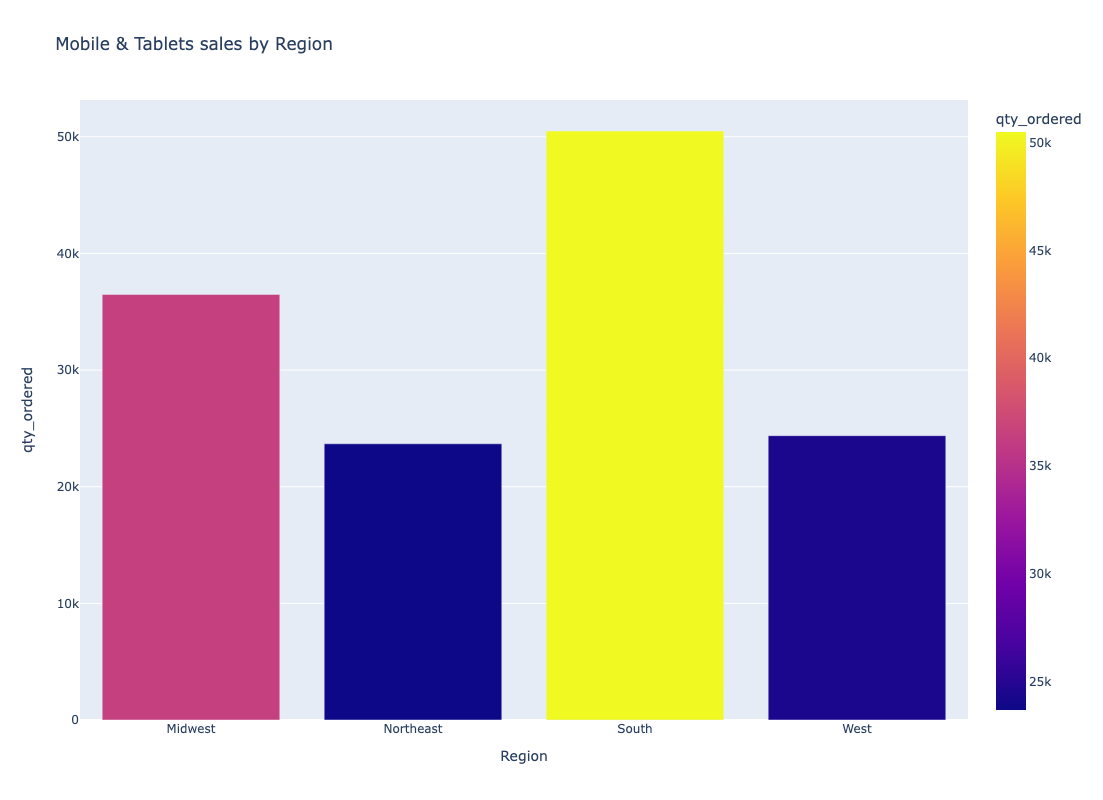

In [ ]:
# Plot bar chart with Plotly Express
fig = px.bar(Mobile_Category_df, x='Region', y='qty_ordered', title='Mobile & Tablets sales by Region',
             hover_data=['qty_ordered'], color='qty_ordered')

# Increase the size of the pie chart
fig.update_layout(width=500, height=800)

# Show figure
fig.show()

In [ ]:
##Mobiles & Tablets sold the most in the South, then Midwest, then West and then Northeast. Could it be due to Immigrants migrations?

In [ ]:
#Superstore vs Online Sales coorelation

In [ ]:
# Superstore vs Online Sales coorelation
Superstore_corr = QtySold_by_Region_Category[QtySold_by_Region_Category['category']=='Superstore']
Superstore_corr.head()

Region    category  qty_ordered
13    Midwest  Superstore        35424
28  Northeast  Superstore        17088
43      South  Superstore        31229
58       West  Superstore        18223

In [ ]:
Superstore_total_qty = Superstore_corr.sum()
Superstore_total_qty

Region                        MidwestNortheastSouthWest
category       SuperstoreSuperstoreSuperstoreSuperstore
qty_ordered                                      101964
dtype: object

In [ ]:
total_qty_corr = main_df.groupby('Region')['qty_ordered'].sum()
total_corr = total_qty_corr.sum()
total_corr

862411

In [ ]:
Superstore_percentage = (Superstore_total_qty['qty_ordered'] / total_corr) * 100
print(round(Superstore_percentage,2))

11.82


In [ ]:
remainder_percentage = (Superstore_percentage - 100)
print(round(remainder_percentage,2))

-88.18


In [ ]:
##Above shows only 11.82% of Sales took place in Superstores, Rest 88.18% of Sales took place on Amazon Online E-Commerce website

In [ ]:
pivot_df2 = QtySold_by_Region_Category.pivot_table(index='Region', columns='category', values='qty_ordered', aggfunc='sum')
pivot_df2.reset_index(inplace=True)
pivot_df2.head()

category     Region  Appliances  Beauty & Grooming  Books  Computing  \
0           Midwest       22889              19428    495       5417   
1         Northeast       14110              11968    378       3547   
2             South       30511              24235    851       7928   
3              West       14925              15491    439       3614   

category  Entertainment  Health & Sports  Home & Living  Kids & Baby  \
0                  9351            12338          11685         5588   
1                  5936             3735           7277         3817   
2                 12539             8665          15129         7430   
3                  6962             3873           7739         3820   

category  Men's Fashion  Mobiles & Tablets  Others  School & Education  \
0                 29122              36484   34142                1162   
1                 18882              23681   18576                 735   
2                 36204              50498   37864                1711   
3                 18166              24378   18684                 823   

category  Soghaat  Superstore  Women's Fashion  
0            8453       35424            21289  
1            5386       17088            15173  
2            8990       31229            29357  
3            5452       18223            13125

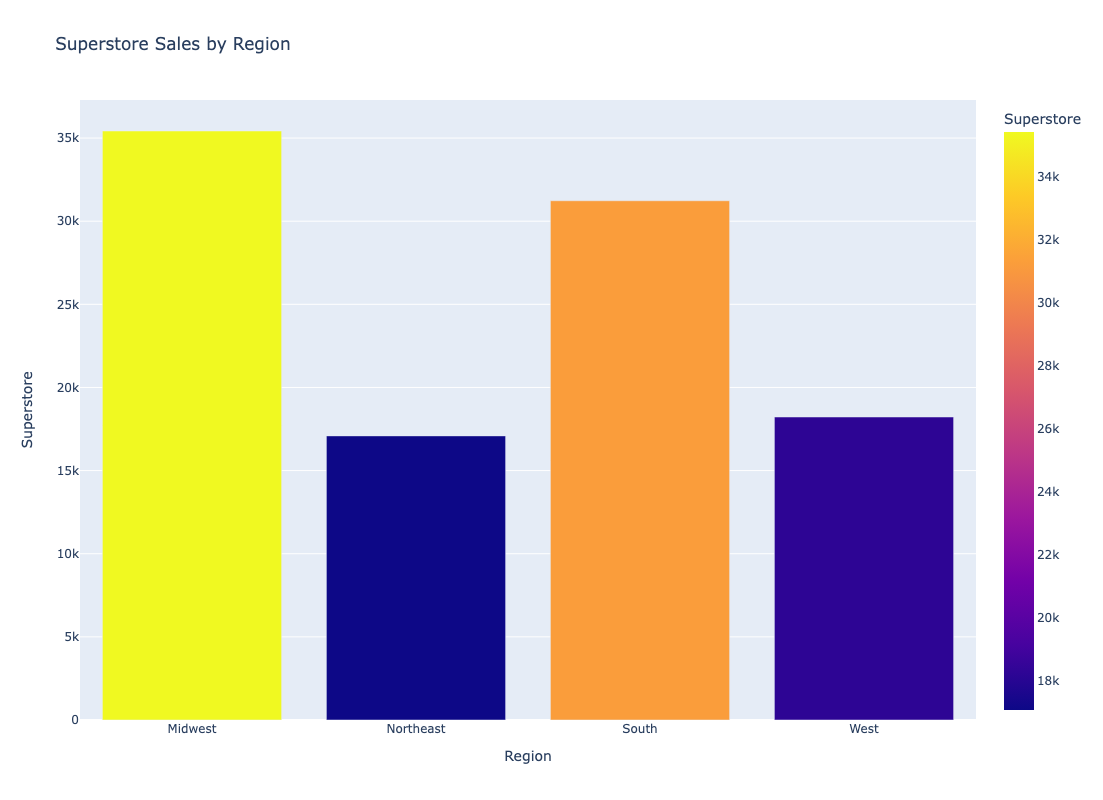

In [ ]:
#Superstore Sales by Region

fig = px.bar(pivot_df2, x='Region', y='Superstore', title='Superstore Sales by Region',
             hover_data=['Superstore'], color='Superstore',barmode='group')

# Increase the size of the pie chart
fig.update_layout(width=500, height=800)

In [ ]:
##Overall In-store purchases were highest in Midwest, then South, then West and then Northeast. 

In [ ]:
# Correlation Analysis
pivot_df = QtySold_by_Region_Category.pivot_table(index='Region', columns='category', values='qty_ordered', aggfunc='sum')
pivot_df.head()

category   Appliances  Beauty & Grooming  Books  Computing  Entertainment  \
Region                                                                      
Midwest         22889              19428    495       5417           9351   
Northeast       14110              11968    378       3547           5936   
South           30511              24235    851       7928          12539   
West            14925              15491    439       3614           6962   

category   Health & Sports  Home & Living  Kids & Baby  Men's Fashion  \
Region                                                                  
Midwest              12338          11685         5588          29122   
Northeast             3735           7277         3817          18882   
South                 8665          15129         7430          36204   
West                  3873           7739         3820          18166   

category   Mobiles & Tablets  Others  School & Education  Soghaat  Superstore  \
Region                                                                          
Midwest                36484   34142                1162     8453       35424   
Northeast              23681   18576                 735     5386       17088   
South                  50498   37864                1711     8990       31229   
West                   24378   18684                 823     5452       18223   

category   Women's Fashion  
Region                      
Midwest              21289  
Northeast            15173  
South                29357  
West                 13125

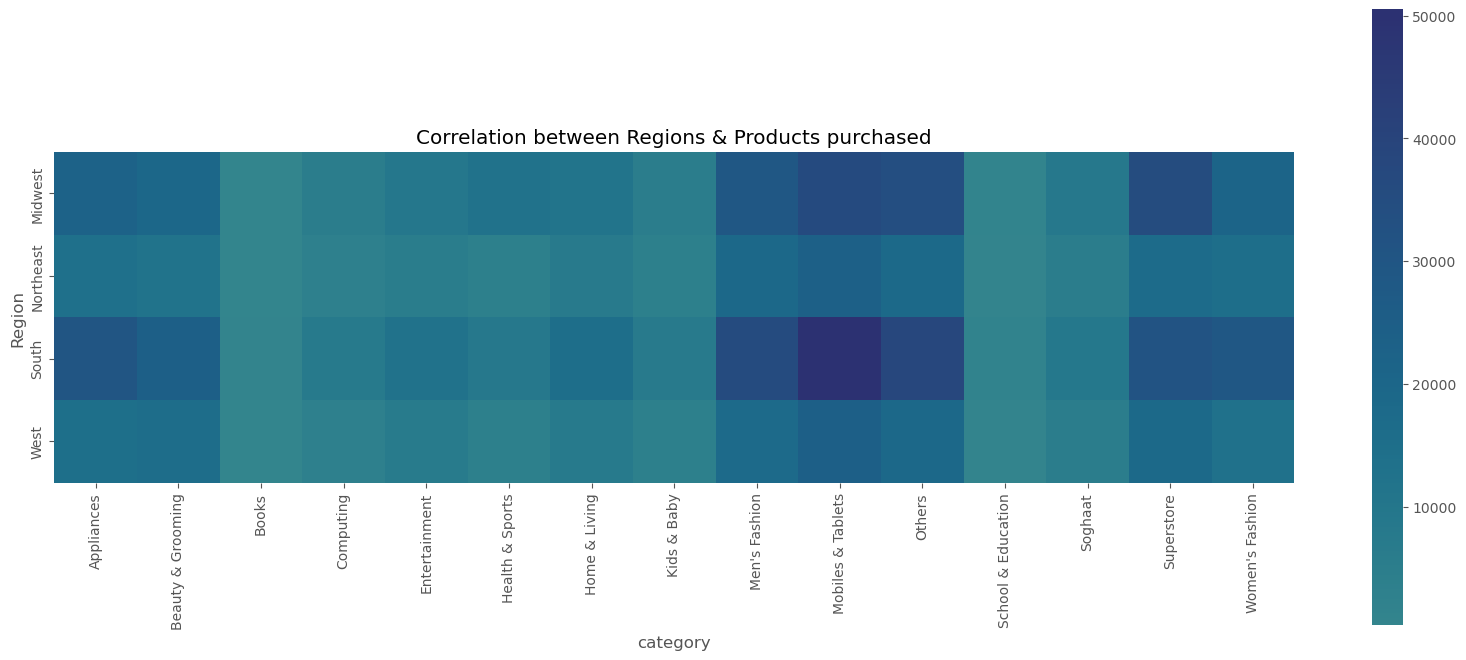

In [ ]:
#Plot correlation between Region and Categories
plt.figure(figsize=(20,8))
sns.heatmap(pivot_df, annot=False, cmap='crest', center=0,square=True)
plt.title('Correlation between Regions & Products purchased')
plt.show()

In [ ]:
##Light color indicates lower correlation so in this case lower quantities sold for those categories, 
##whereas darker shade indicate a higher correlation between products sold in that category with the region across it. 
##For example, Appliances sold the highest in South region and so did Mobiles & Tablets, as well as Women's Fashion products.

In [ ]:
# Calculate correlation matrix
correlation_matrix = pivot_df.corr()
correlation_matrix

category            Appliances  Beauty & Grooming     Books  Computing  \
category                                                                 
Appliances            1.000000           0.972789  0.939060   0.994077   
Beauty & Grooming     0.972789           1.000000  0.925027   0.958226   
Books                 0.939060           0.925027  1.000000   0.966245   
Computing             0.994077           0.958226  0.966245   1.000000   
Entertainment         0.993851           0.988996  0.956951   0.989986   
Health & Sports       0.706223           0.696222  0.424729   0.628550   
Home & Living         0.999657           0.974748  0.930981   0.990890   
Kids & Baby           0.998507           0.960887  0.945897   0.997443   
Men's Fashion         0.994147           0.950775  0.902200   0.982593   
Mobiles & Tablets     0.998306           0.965373  0.954116   0.998693   
Others                0.964063           0.934082  0.814309   0.931963   
School & Education    0.992487           0.972185  0.973878   0.997614   
Soghaat               0.954352           0.927611  0.794439   0.918412   
Superstore            0.823666           0.815159  0.584654   0.759087   
Women's Fashion       0.985990           0.921779  0.932290   0.990591   

category            Entertainment  Health & Sports  Home & Living  \
category                                                            
Appliances               0.993851         0.706223       0.999657   
Beauty & Grooming        0.988996         0.696222       0.974748   
Books                    0.956951         0.424729       0.930981   
Computing                0.989986         0.628550       0.990890   
Entertainment            1.000000         0.666404       0.993110   
Health & Sports          0.666404         1.000000       0.723517   
Home & Living            0.993110         0.723517       1.000000   
Kids & Baby              0.989761         0.681592       0.996971   
Men's Fashion            0.976736         0.757190       0.995095   
Mobiles & Tablets        0.992706         0.666869       0.996442   
Others                   0.941848         0.867650       0.970003   
School & Education       0.995763         0.618038       0.989550   
Soghaat                  0.931566         0.884972       0.961234   
Superstore               0.793010         0.982677       0.837652   
Women's Fashion          0.966831         0.659969       0.983027   

category            Kids & Baby  Men's Fashion  Mobiles & Tablets    Others  \
category                                                                      
Appliances             0.998507       0.994147           0.998306  0.964063   
Beauty & Grooming      0.960887       0.950775           0.965373  0.934082   
Books                  0.945897       0.902200           0.954116  0.814309   
Computing              0.997443       0.982593           0.998693  0.931963   
Entertainment          0.989761       0.976736           0.992706  0.941848   
Health & Sports        0.681592       0.757190           0.666869  0.867650   
Home & Living          0.996971       0.995095           0.996442  0.970003   
Kids & Baby            1.000000       0.993316           0.999559  0.955181   
Men's Fashion          0.993316       1.000000           0.989910  0.981281   
Mobiles & Tablets      0.999559       0.989910           1.000000  0.948889   
Others                 0.955181       0.981281           0.948889  1.000000   
School & Education     0.993364       0.974902           0.996336  0.924828   
Soghaat                0.943873       0.973465           0.937114  0.999310   
Superstore             0.802353       0.860807           0.791127  0.942629   
Women's Fashion        0.993099       0.988114           0.990564  0.941932   

category            School & Education   Soghaat  Superstore  Women's Fashion  
category                                                                       
Appliances                    0.992487  0.954352    0.823666   

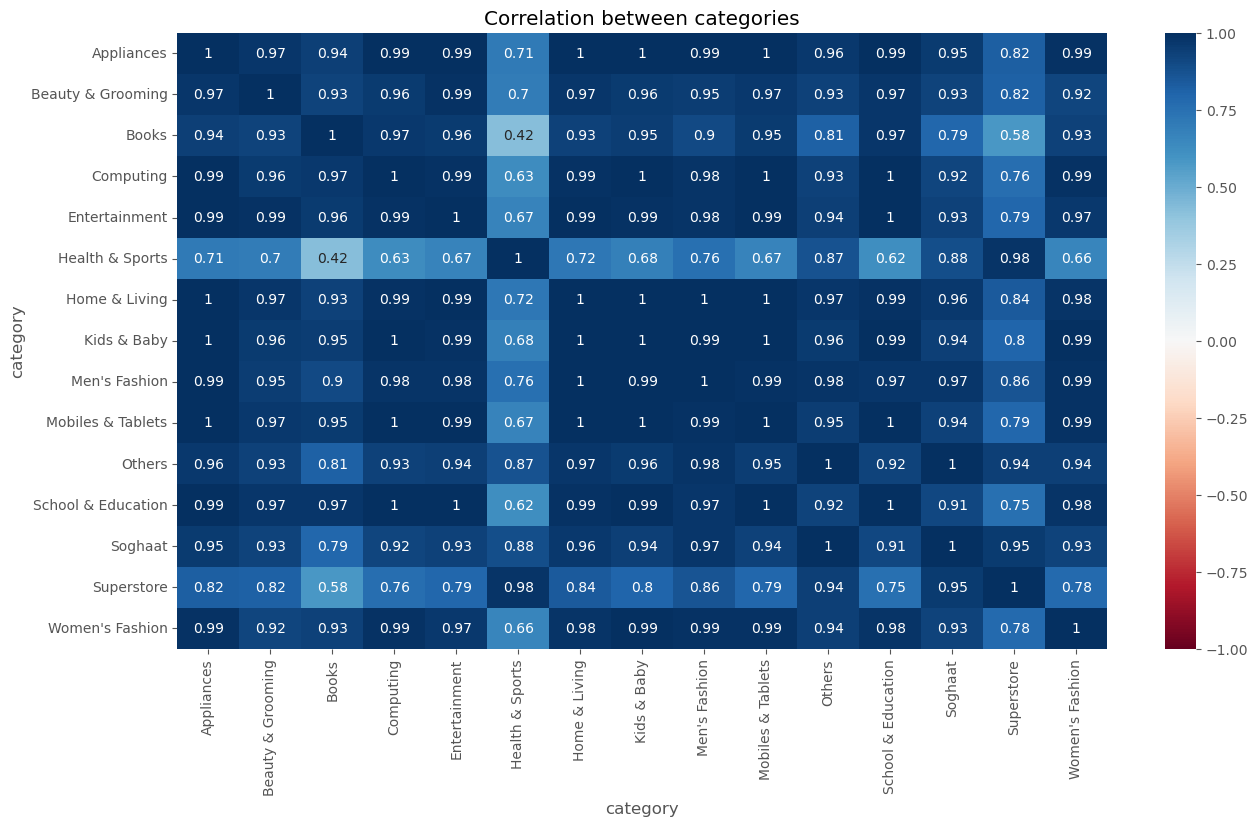

In [ ]:
#Plot correlation between variables 
correlation_matrix = pivot_df.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', vmin=-1,vmax=1)
plt.title('Correlation between categories')
plt.show()

In [ ]:
##Red color and -1 indicates lower correlation so in this case lower quantities sold for those categories, 
##whereas darkest blue and +1 indicate a higher correlation between products sold in that category. 
##For example, Health & Sports products have the strongest correlation (dark blue & 0.98 score, closest to +1) to Superstore 
##whereas Books have the weakest coorelation (light blue & 0.42) indicating Superstores were selling Health & Sports way more than books.

## <em>Sales Discount Trends<em>
#### - Evaluate discount trends across time period, product category
#### - Look for any corelation between time period and discounts
#### - Look for any corelation between order quantity and discounts 

In [ ]:
gh_main_df = pd.read_csv('Resources/Amazon Sales FY2020-21.csv', low_memory=False)
# Convert 'order_date' to datetime format and set as index for time series analysis
gh_main_df["order_date"] = pd.to_datetime(gh_main_df["order_date"], dayfirst=True, format="mixed")

# Sort by 'order_date'
gh_main_df.sort_values(by='order_date', ascending=True)
gh_main_df.set_index('order_date', inplace=True)
gh_main_df.head()

order_id    status  item_id                  sku  qty_ordered  \
order_date                                                                   
2020-10-01  100354678  received   574772   oasis_Oasis-064-36           21   
2020-10-01  100354678  received   574774      Fantastic_FT-48           11   
2020-10-01  100354680  complete   574777      mdeal_DMC-610-8            9   
2020-10-01  100354680  complete   574779   oasis_Oasis-061-36            9   
2020-11-13  100367357  received   595185  MEFNAR59C38B6CA08CD            2   

            price   value  discount_amount   total       category  ...  \
order_date                                                         ...   
2020-10-01   89.9  1798.0              0.0  1798.0  Men's Fashion  ...   
2020-10-01   19.0   190.0              0.0   190.0  Men's Fashion  ...   
2020-10-01  149.9  1199.2              0.0  1199.2  Men's Fashion  ...   
2020-10-01   79.9   639.2              0.0   639.2  Men's Fashion  ...   
2020-11-13   99.9    99.9              0.0    99.9  Men's Fashion  ...   

           Sign in date    Phone No.   Place Name  County    City  State  \
order_date                                                                 
2020-10-01    8/22/2006  405-959-1129      Vinson  Harmon  Vinson     OK   
2020-10-01    8/22/2006  405-959-1129      Vinson  Harmon  Vinson     OK   
2020-10-01    8/22/2006  405-959-1129      Vinson  Harmon  Vinson     OK   
2020-10-01    8/22/2006  405-959-1129      Vinson  Harmon  Vinson     OK   
2020-11-13    8/22/2006  405-959-1129      Vinson  Harmon  Vinson     OK   

              Zip Region User Name Discount_Percent  
order_date                                           
2020-10-01  73571  South   jwtitus              0.0  
2020-10-01  73571  South   jwtitus              0.0  
2020-10-01  73571  South   jwtitus              0.0  
2020-10-01  73571  South   jwtitus              0.0  
2020-11-13  73571  South   jwtitus              0.0  

[5 rows x 34 columns]

In [ ]:
print(gh_main_df.info())
print(gh_main_df.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 286392 entries, 2020-10-01 to 2021-09-30
Data columns (total 34 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          286392 non-null  object 
 1   status            286392 non-null  object 
 2   item_id           286392 non-null  int64  
 3   sku               286392 non-null  object 
 4   qty_ordered       286392 non-null  int64  
 5   price             286392 non-null  float64
 6   value             286392 non-null  float64
 7   discount_amount   286392 non-null  float64
 8   total             286392 non-null  float64
 9   category          286392 non-null  object 
 10  payment_method    286392 non-null  object 
 11  bi_st             286392 non-null  object 
 12  cust_id           286392 non-null  int64  
 13  year              286392 non-null  int64  
 14  month             286392 non-null  object 
 15  ref_num           286392 non-null  int64  
 16  Name

In [ ]:
#Rename columns
gh_main_df.rename(columns={'qty_ordered':'Order Quantity',
                           'price': 'Price',
                           'value': 'Order Amount',
                           'discount_amount': 'Discount Amount',
                           'total': 'Total Amount',
                           'Discount_Percent': 'Discount Percent'}, inplace=True )

In [ ]:
# Build list of columns using which graphs will be plotted
# my_columns = ['Order Quantity', 'Price', 'Order Amount','Discount Amount', 'Total Amount', 'Discount Percent']
my_columns = ['Order Quantity', 'Price', 'Discount Percent']

#### ***Histograms***

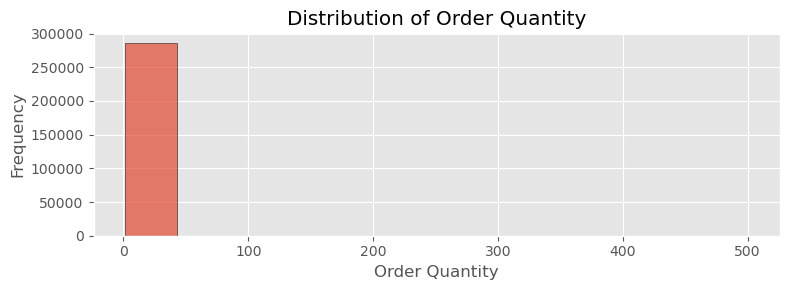

The mean of Order Quantity is: 3.01
The standard deviation of Order Quantity is: 4.57


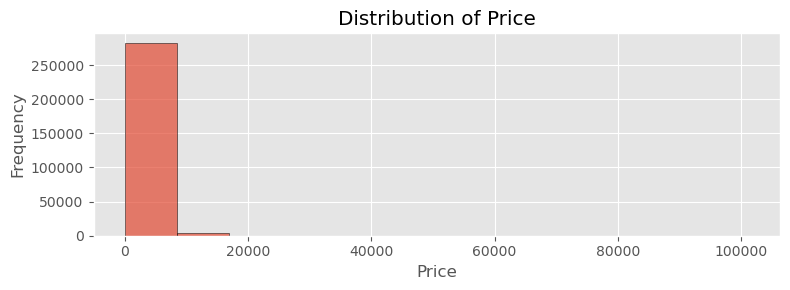

The mean of Price is: 851.39
The standard deviation of Price is: 1741.75


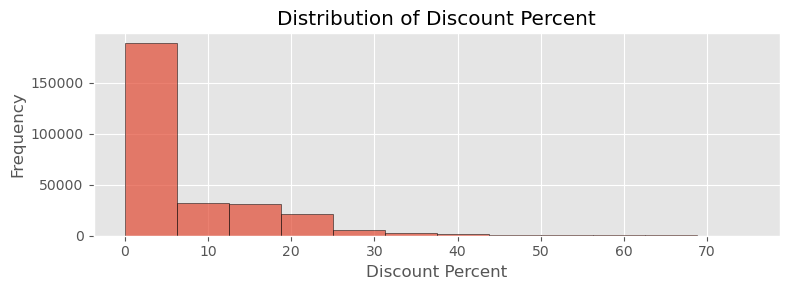

The mean of Discount Percent is: 6.07
The standard deviation of Discount Percent is: 10.1


In [ ]:
# Histograms for numeric data to see distribution

for col in my_columns:
    plt.figure(figsize=(8, 3))
    plt.hist(gh_main_df[col].dropna(), bins=12, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

    #Download image
    filepath = "Images/1. Distribution for " + col + ".png"
    plt.savefig(filepath)
    plt.show()

    print(f"The mean of {col} is: {round(gh_main_df[col].mean(),2)}")
    print(f"The standard deviation of {col} is: {round(gh_main_df[col].std(),2)}")
    

#### Histogram analysis:
*Order Quantity*:
- There is a very high frequency of orders with smaller quantities.
- The distribution is very left-skewed, indicating most customers place orders with low quantities.
- Mean of Order Quantity: 3.01. This average suggests that the typical order quantity is around 3 items, consistent with the concentration of data in the first bin.
Standard Deviation of Order Quantity: 4.57. This indicates a relatively high variance around the mean. Given the skew of the histogram, this standard deviation is influenced by a few larger orders that pull the average slightly higher than the most common quantities (which are very low).

*Price*:
- The histogram is highly left-skewed, meaning that the majority of prices are low, with fewer items priced higher as indicated by the lack of bars in higher price ranges.
- The presence of a single bar in the lowest range shows that the vast majority of items or services are low priced, with very few items exceeding this price range.
- Mean Price: 851.39. This suggests that, on average, the price of items or services is around 851.39.
- Standard Deviation of Price: 1741.75. This relatively high standard deviation in comparison to the mean indicates that there is a wide variation in prices. However, given that most data points are low, this variability is mostly within lower-priced items.
- The distribution suggests that the Amazon primarily deals in lower-priced goods. High-priced items are rare or non-existent in this dataset.

Discount Percent: 
- The highest frequency of discounts is in the 0% bin, indicating that most items were sold without any discount.
- The frequency decreases significantly as the discount percentage increases. This suggests that higher discounts are less common.
- The histogram is right-skewed, meaning there are a few instances of very high discounts but these are rare.
- The mean discount percentage is approximately 6.07. This indicates that on average, a discount close to 6% was applied across all transactions.
- The standard deviation is 10.1, which suggests a wide variation in the discount percentages applied. This high standard deviation relative to the mean indicates that while most discounts are low (as shown by the mean), there are instances of much higher discounts that affect the distribution's spread.
- This suggests most products are sold at full price or with minimal discounts, and only a few products are heavily discounted, possibly to clear stock.

#### Box Plots

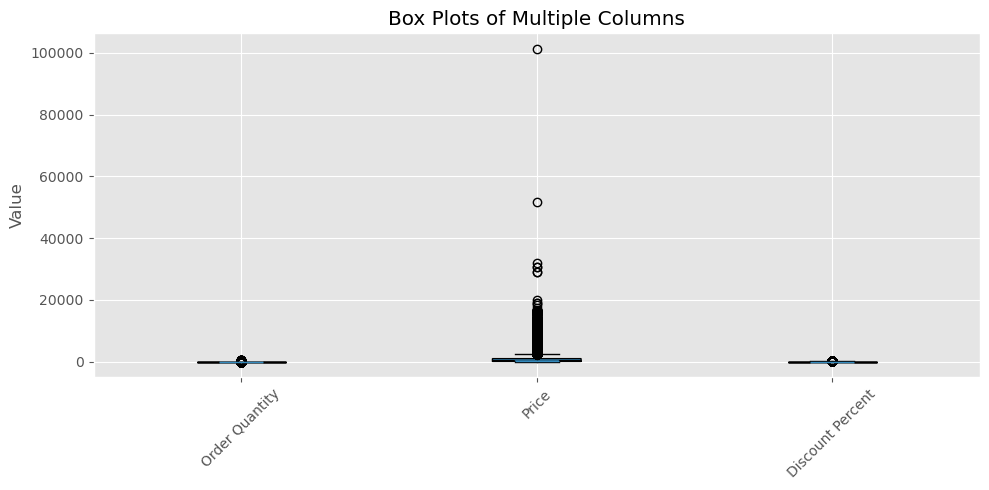

In [ ]:
# Data for all columns that are considered for Box plot
plot_data = [gh_main_df[col].dropna() for col in my_columns]

# Create a figure object and an axis object
plt.figure(figsize=(10, 5))
# Boxplot
box = plt.boxplot(plot_data, notch=True, patch_artist=True)
    
# Adding titles and labels
plt.title('Box Plots of Multiple Columns')
plt.ylabel('Value')
# Customize the x-ticks to show column names
plt.xticks(range(1, len(my_columns) + 1), my_columns, rotation=45)  # Rotate labels for better readability
# Layout adjustment to accommodate x-labels
plt.tight_layout()

# Save the figure
plt.savefig("Images/2. Combined Box Plots.png")
# Show the plot
plt.show()

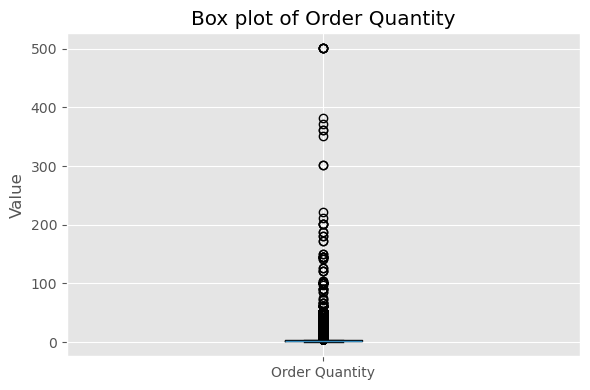

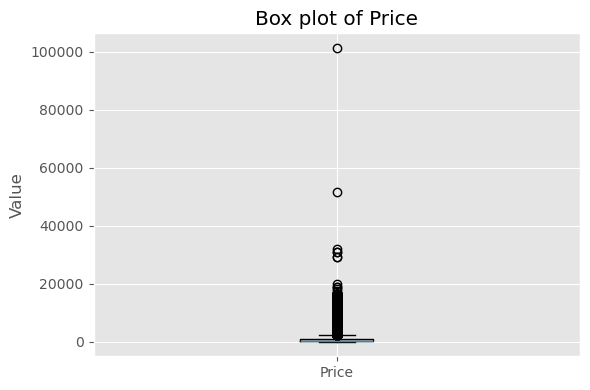

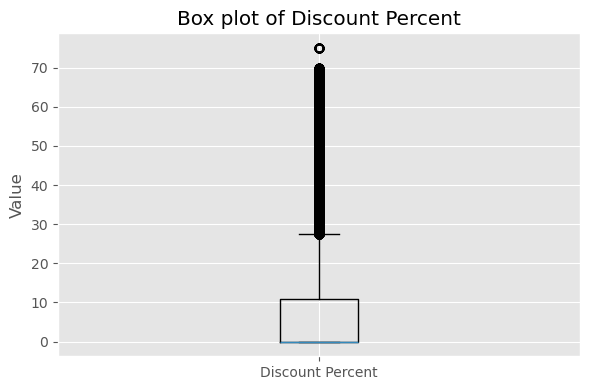

In [ ]:
# Box plots for numeric data to identify outliers
for col in my_columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(gh_main_df[col].dropna())
    plt.title(f'Box plot of {col}')
    plt.xticks([1], [col])
    plt.ylabel('Value')
    plt.tight_layout()

    filepath = "Images/2. Box plot for" + col + ".png"
    plt.savefig(filepath)
    plt.show()

#### Box Plots analysis:

Order Quantity:
- Median (the line inside the box): This is the middle value of the data. In this box plot, the median is very low, close to the bottom of the box, suggesting that the central tendency of your data is skewed towards smaller order quantities.
- Box (the rectangle): Represents the interquartile range (IQR), which contains the middle 50% of the data. The box extends from the first quartile (Q1) to the third quartile (Q3) of the dataset. The relatively small height of the box indicates that 50% of the data is closely packed around a low range of values.
- Whiskers: Extend from the box to the smallest and largest values within 1.5 times the IQR from the quartiles, not considering outliers. In this plot, the whiskers indicate that there are some slightly larger order quantities.
- Outliers (dots above the whiskers): These are the data points that fall outside 1.5 times the IQR. The plot shows many outliers, indicating that there are several unusually large order quantities compared to the rest.
- The concentration of the data around a lower range with many outliers at the upper end suggests a right-skewed distribution. This means that while most orders are of lower quantities, there are a few orders with much higher quantities.
- The significant number of outliers at higher values could indicate special cases or errors, bulk orders, or promotions that aren't representative of typical order behavior.

Price:
- Median (the line inside the box): The median price, represented by the line inside the box, is quite low compared to the range of the data, suggesting that the central price point is much lower than the highest prices.
- Box (the rectangle): The box, which represents the interquartile range (IQR), indicates the middle 50% of the price data. The box is narrow and located at the lower part of the overall range, showing that most prices are low or moderate but grouped tightly around the median.
- Whiskers: These extend from the box to the largest and smallest values that are not considered outliers, based on 1.5 times the IQR. In this case, the upper whisker extends up to around 20,000, indicating that most prices under this are not considered unusually high in this dataset.
- Outliers (circles): These points lie beyond the whiskers and are considered outside 1.5 times the IQR. This plot has a few outliers at very high prices (above 20,000), with the highest outliers around 80,000 and 100,000.
- distribution is highly right-skewed, which means the bulk of the data consists of lower-priced items, with a few items priced significantly higher than the median. This skewness indicates that while most items or services are relatively affordable, there are a few very high-priced items.
- The presence of outliers at high values suggests either luxury items or services, errors in data or premium services/products.
  
Discount Percent:
- Median (the line inside the box): The median discount percentage, visible as a line within the box, is very low, suggesting that more than half of the discounts given are minimal or close to 0%.
- Box (the rectangle): Represents the interquartile range (IQR), containing the middle 50% of the data. The box is located close to the bottom of the y-axis, indicating that the bulk of discounts are very low.
- Whiskers: These extend from the box to the highest and lowest values that are still within 1.5 times the IQR from the quartiles. The upper whisker extends significantly higher than the box, indicating that while most discounts are low, there are some moderately high discounts given.
- Outliers (circles): The plot shows one outlier significantly above the upper whisker, around 70%, suggesting an extremely high discount that is not typical of the general data distribution.
- Data distribution is right-skewed, indicating that while most discounts are low, there are a few cases with much higher discounts.
- Most of the data (central 50%) is concentrated near the lower range, with the median discount close to 0%, which suggests that offering no or low discount is the common practice.
- The concentration of low discounts could suggest that Amzon model relies less on discounts to drive sales, or that customers are purchasing without needing large incentives.

### Total Sales vs Unemployment Rate
### Total Sales vs Consumer Sentiment Index

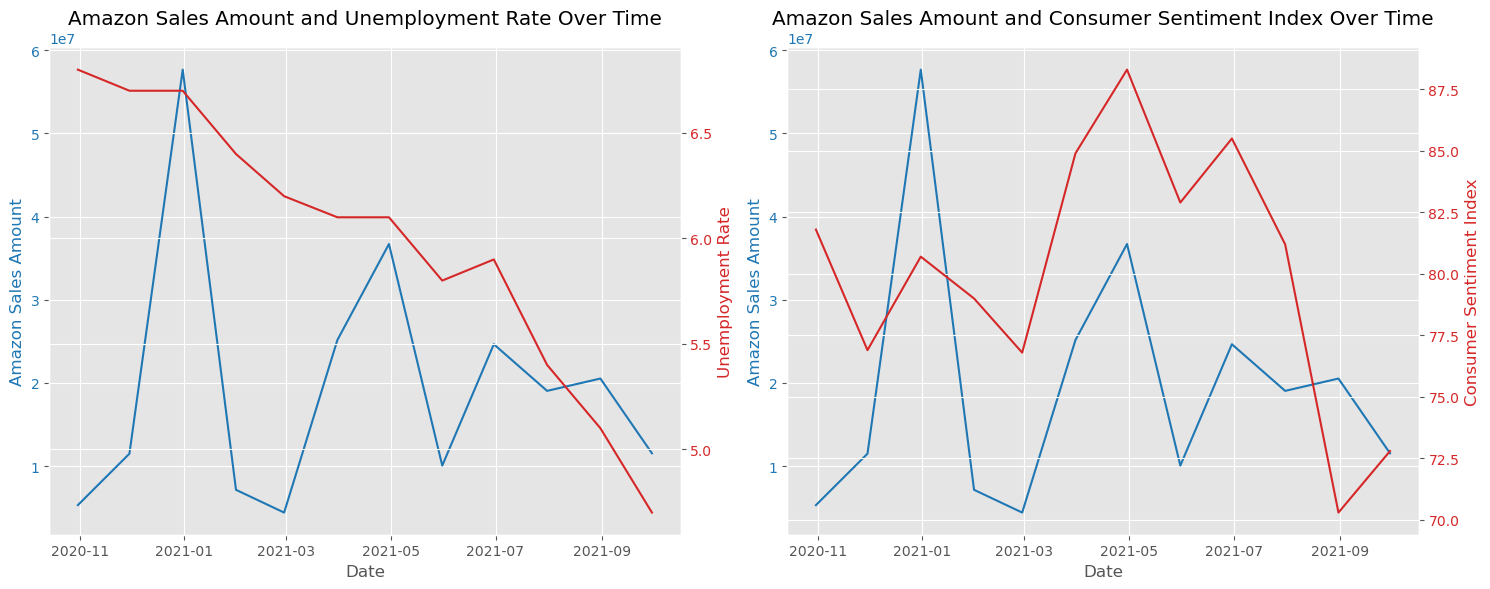

In [ ]:
# Note: # Unemployment rate bet 10/2020-09/2021 from Bureau of Labor Statistics (https://www.bls.gov/charts/employment-situation/civilian-unemployment-rate.htm)
# Note: # Consumer Sentiment Index between 10/2020-09/2021 data is from Bureau of Labor Statistics (https://www.bls.gov/charts/employment-situation/civilian-unemployment-rate.htm)

monthly_sales = gh_main_df['Total Amount'].resample('ME').sum()

# Data for Amazon Sales Amount and Unemployment Rate Over Time chart
data1 = {
    'Date': pd.date_range(start='2020-10-01', periods=12, freq='ME'),
    'Sales Amount': monthly_sales,
    'Unemployment Rate': [6.8, 6.7, 6.7, 6.4, 6.2, 6.1, 6.1, 5.8, 5.9, 5.4, 5.1, 4.7]
}
df1 = pd.DataFrame(data1)

# Data for Amazon Sales Amount and Consumer Sentiment Index Over Time chart
data2 = {
    'Date': pd.date_range(start='2020-10-01', periods=12, freq='ME'),
    'Sales Amount': monthly_sales,
    'Consumer Sentiment Index': [81.8, 76.9, 80.7, 79, 76.8, 84.9, 88.3, 82.9, 85.5, 81.2, 70.3, 72.8]
}
df2 = pd.DataFrame(data2)

# Create subplots
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(15, 6))

# Plot Amazon Sales Amount and Unemployment Rate Over Time chart
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Amazon Sales Amount', color=color)
ax1.plot(df1['Date'], df1['Sales Amount'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Amazon Sales Amount and Unemployment Rate Over Time')

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Unemployment Rate', color=color)
ax2.plot(df1['Date'], df1['Unemployment Rate'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

# Plot for Amazon Sales Amount and Consumer Sentiment Index Over Time chart
color = 'tab:blue'
ax3.set_xlabel('Date')
ax3.set_ylabel('Amazon Sales Amount', color=color)
ax3.plot(df2['Date'], df2['Sales Amount'], color=color)
ax3.tick_params(axis='y', labelcolor=color)
ax3.set_title('Amazon Sales Amount and Consumer Sentiment Index Over Time')

ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Consumer Sentiment Index', color=color)
ax4.plot(df2['Date'], df2['Consumer Sentiment Index'], color=color)
ax4.tick_params(axis='y', labelcolor=color)
ax3.grid(True)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig("Images/Amazon Sales Amount Comparison.png")
plt.show()

#### Weekly Sales

In [ ]:
weekly_sales = gh_main_df['Total Amount'].resample('W').sum()
weekly_sales.to_frame('Total Amount')

Total Amount
order_date              
2020-10-04  6.583302e+05
2020-10-11  8.579407e+05
2020-10-18  1.492740e+06
2020-10-25  1.261355e+06
2020-11-01  1.343554e+06
2020-11-08  1.756853e+06
2020-11-15  6.039031e+06
2020-11-22  2.097926e+06
2020-11-29  1.184394e+06
2020-12-06  1.248578e+06
2020-12-13  2.567206e+06
2020-12-20  1.021702e+07
2020-12-27  3.194761e+07
2021-01-03  1.309871e+07
2021-01-10  1.786365e+06
2021-01-17  1.473941e+06
2021-01-24  1.284184e+06
2021-01-31  1.277267e+06
2021-02-07  1.442348e+06
2021-02-14  1.062525e+06
2021-02-21  9.107673e+05
2021-02-28  9.885583e+05
2021-03-07  2.204427e+06
2021-03-14  1.238234e+06
2021-03-21  4.555793e+06
2021-03-28  1.273703e+07
2021-04-04  1.130559e+07
2021-04-11  3.765591e+06
2021-04-18  1.507232e+07
2021-04-25  2.432279e+06
2021-05-02  9.983803e+06
2021-05-09  1.769951e+06
2021-05-16  1.987284e+06
2021-05-23  2.696717e+06
2021-05-30  1.798869e+06
2021-06-06  3.760477e+06
2021-06-13  7.170736e+06
2021-06-20  5.653350e+06
2021-06-27  4.880780e+06
2021-07-04  6.781081e+06
2021-07-11  5.047716e+06
2021-07-18  3.866773e+06
2021-07-25  3.929540e+06
2021-08-01  3.381912e+06
2021-08-08  4.218191e+06
2021-08-15  5.840615e+06
2021-08-22  5.628754e+06
2021-08-29  3.495518e+06
2021-09-05  3.020832e+06
2021-09-12  2.410655e+06
2021-09-19  4.236083e+06
2021-09-26  1.836514e+06
2021-10-03  9.455839e+05

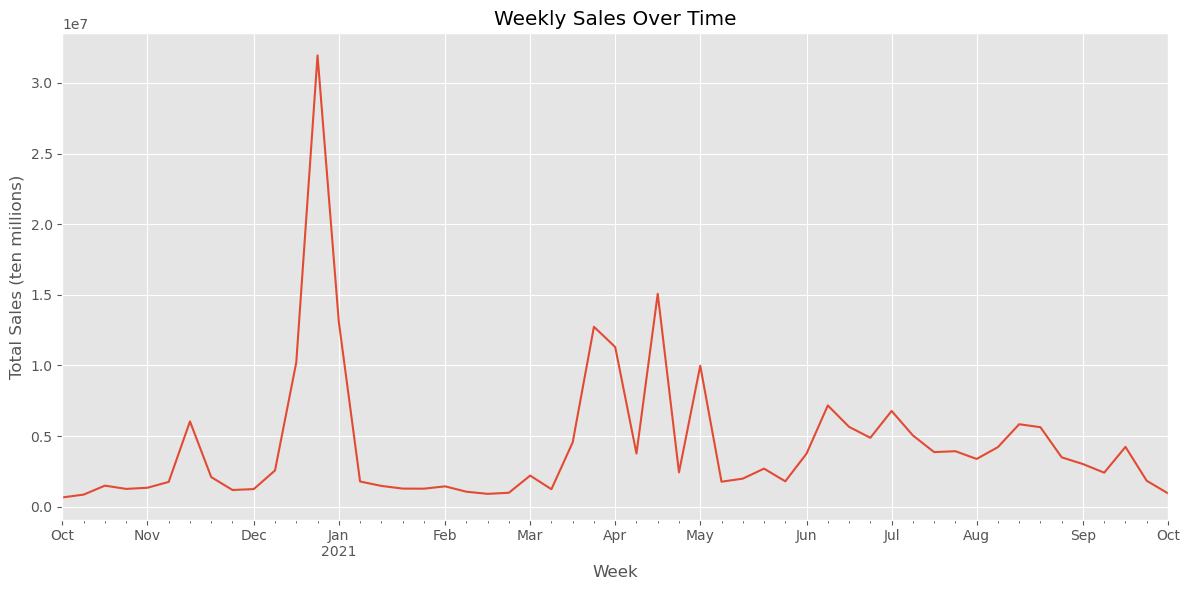

In [ ]:
# Time Series Analysis for Weekly Sales
plt.figure(figsize=(12, 6))
weekly_sales.plot()
plt.title('Weekly Sales Over Time')
plt.xlabel('Week')
plt.ylabel('Total Sales (ten millions)')
plt.grid(True)
plt.tight_layout()

plt.savefig("Images/3. Total Sales (line).png")
plt.show()

#### Weekly Sales Over Time:
- Sales trend over this period reveals significant seasonal impacts, with a major peak around December and other smaller peaks. It could be due to holiday driven sales or mid year graduation, wedding & other celebrations.
- From the highest peak in December, there's a general trend of fluctuation but with a noticeable decline towards the end of the period (September and October). The fluctuating yet declining trend. This cyclical nature in sales could be aligned with consumer behavior and seasonal purchasing patterns.

#### Scatter plot for Discount Amount vs Order Quantity

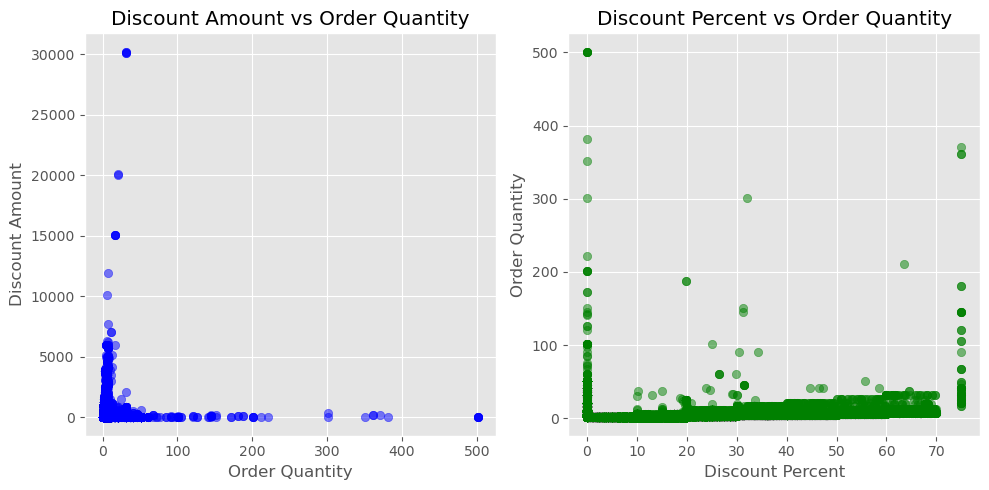

In [ ]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# First scatter plot
ax1.scatter(gh_main_df['Order Quantity'], gh_main_df['Discount Amount'], color='blue', alpha=0.5)
ax1.set_title("Discount Amount vs Order Quantity")
ax1.set_xlabel('Order Quantity')
ax1.set_ylabel('Discount Amount')
ax1.grid(True)

# Second scatter plot
ax2.scatter(gh_main_df['Discount Percent'], gh_main_df['Order Quantity'], color='green', alpha=0.5)
ax2.set_title("Discount Percent vs Order Quantity")
ax2.set_xlabel('Discount Percent')
ax2.set_ylabel('Order Quantity')
ax2.grid(True)
            
# Layout adjustment to ensure there's no overlap
plt.tight_layout()
#Save image
plt.savefig("Images/4. Combined scatter plot.png")
# Show the combined plot
plt.show()

#### Discount Amount vs Order Quantity Analysis:
- Most data points are clustered at the lower end of both axes. This suggests that for the majority of transactions, both the discount amount and the quantity ordered are relatively low.
- The concentration of points around low discount amounts and quantities might indicate that the Aamzon typically deals with small transactions. Amazon mostly does not offer much bulk purchases compared to it's competitors like Costco or Sam's Club.
- There are a few outliers that show high discount amounts and/or high quantities ordered. These outliers could represent special cases such as rare bulk purchases, promotional sales, or other atypical transactions.
- For very high quantity orders (near the maximum on the x-axis), the discount amount does not necessarily increase.
- Most higher discounts are given to orders with quantities ranging broadly from around 20 to 100 units. Beyond this range, even for higher quantities, the discount amount does not proportionately increase.
- There is no clear linear relationship between quantity ordered and discount amount. 

#### Discount Percent vs Order Quantity analysis:
- There is a wide spread of order quantities at very low discount percentages, ranging from single items up to 500 items ordered. This indicates that most transactions, regardless of the quantity ordered, receive little to no discount.
- Most of the transactions are clustered near the bottom of the graph, showing that regardless of the discount percent offered, the majority of orders consist of smaller quantities.
- There are notable outliers, especially at higher quantities (near 500), which seem to receive varying levels of discounts.
- There is no clear or consistent correlation between the discount percent and the quantity ordered.
- Some of the largest orders (in terms of quantity) are associated with very low discounts, suggesting that for some transactions, the incentive of a discount is not necessary to drive large purchases.

#### Correlation Matrix

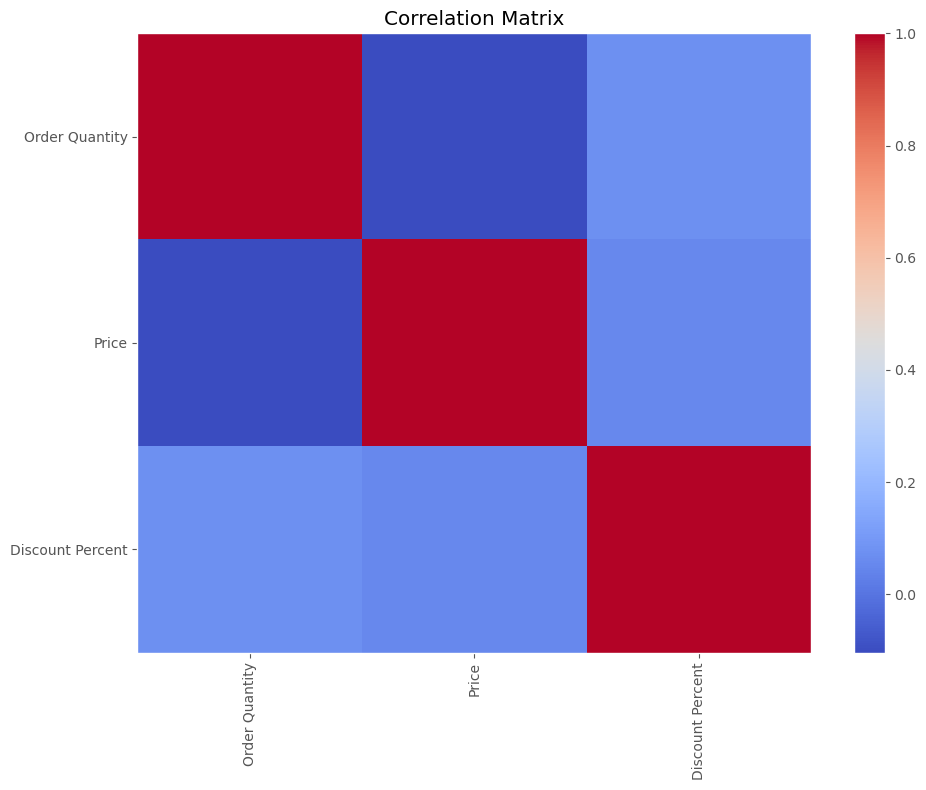

In [ ]:
# Correlation Matrix
corr_matrix = gh_main_df[my_columns].corr()
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation='vertical')
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Matrix')
plt.grid(False)
plt.tight_layout()

plt.savefig("Images/6. Correlation Matrix.png")
plt.show()

#### Analysis: There does not appear to be any correlation across different parameters

In [ ]:
# Correlation between Order Quantity and Discount Percentage
qty_vs_discount_correlation = gh_main_df['Order Quantity'].corr(gh_main_df['Discount Percent'], method='pearson')

print(f"Correlation between Order Quantity and Discount percent: {qty_vs_discount_correlation:.2f}")

Correlation between Order Quantity and Discount percent: 0.07


#### There does not appear to be any correlation between Order Quantity and Discount Amount

### Sales by Categories

In [ ]:
gh_categories = gh_main_df['category'].value_counts()
gh_categories

category
Mobiles & Tablets     61761
Men's Fashion         40713
Appliances            33034
Women's Fashion       28334
Others                26108
Beauty & Grooming     17899
Entertainment         17352
Superstore            15024
Home & Living         13990
Health & Sports        8421
Computing              8110
Soghaat                7250
Kids & Baby            6492
School & Education     1090
Books                   814
Name: count, dtype: int64

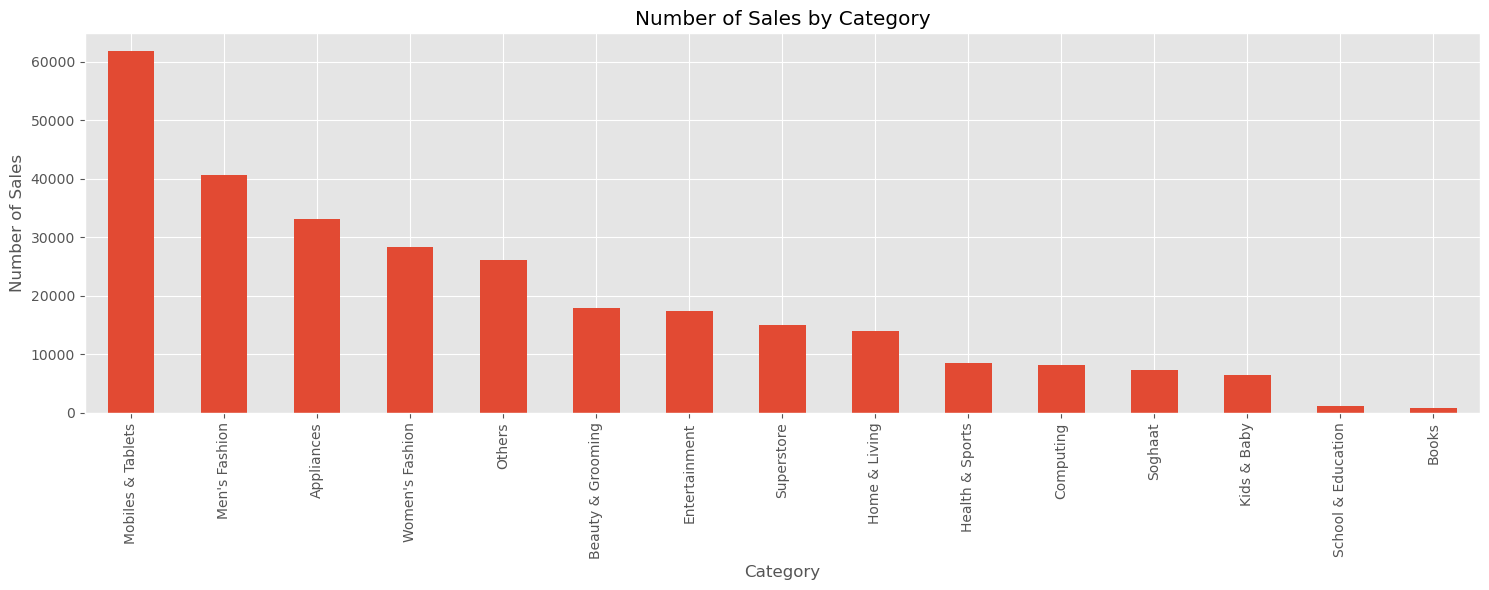

In [ ]:
# Bar chart for number of Sales by category
plt.figure(figsize=(15, 6))
gh_categories.plot(kind='bar')
plt.title('Number of Sales by Category')
plt.xlabel('Category')
plt.ylabel('Number of Sales')
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig("Images/7. Number of Sales by Category Bar.png")
plt.show()

#### Number of Sales by category

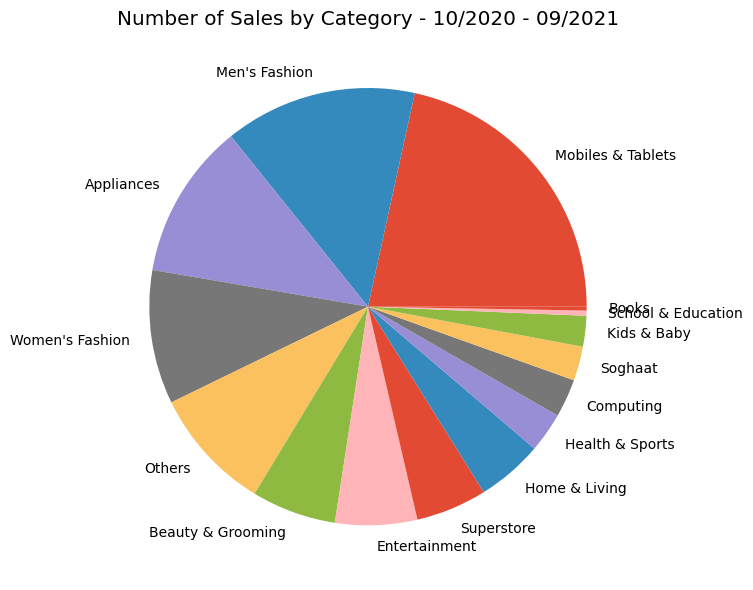

In [ ]:
# Number of Sales by category -pie chart
plt.figure(figsize=(12, 6))
gh_categories.plot(kind='pie')
plt.title('Number of Sales by Category - 10/2020 - 09/2021')
plt.xlabel('')
plt.ylabel('')
# plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("Images/8. Number of Sales by Category Pie.png")
plt.show()

#### Total Sales Amount by Categories

In [ ]:
# Sales by Categories
category_sales_df = gh_main_df.groupby('category').agg({'Total Amount': 'sum'})
category_sales_df

Total Amount
category                        
Appliances          3.006084e+07
Beauty & Grooming   2.644748e+06
Books               3.241695e+04
Computing           9.362343e+06
Entertainment       2.713843e+07
Health & Sports     1.019958e+06
Home & Living       1.810582e+06
Kids & Baby         8.562133e+05
Men's Fashion       4.820147e+06
Mobiles & Tablets   1.301120e+08
Others              1.556433e+07
School & Education  1.147401e+05
Soghaat             5.766999e+05
Superstore          2.886907e+06
Women's Fashion     6.649842e+06

<Figure size 2000x800 with 0 Axes>

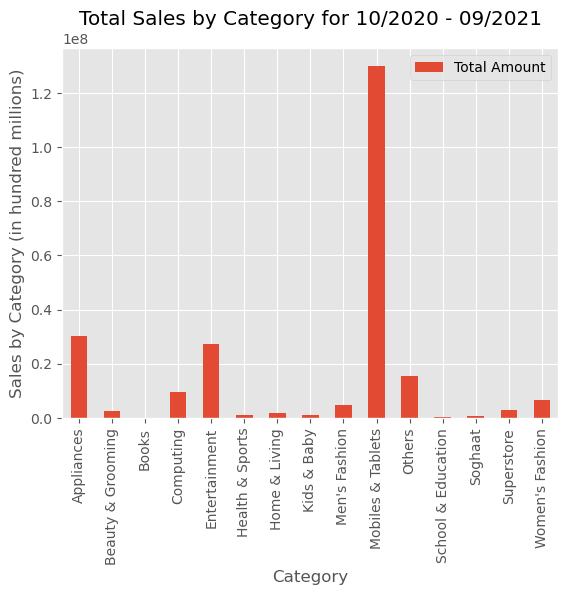

In [ ]:
# Sales by Categories - Plot Using matplotlib
plt.figure(figsize=(20, 8))
category_sales_df.plot(kind='bar')
plt.title('Total Sales by Category for 10/2020 - 09/2021')
plt.xlabel('Category')
plt.ylabel('Sales by Category (in hundred millions)')
plt.xticks(rotation=90)

#plt.tight_layout()
plt.savefig("Images/9. Sales Total by Category (bar).png")
plt.show()

#### Total Amount & Discount Amount by Category

In [ ]:
# New dataframe that is grouped by 'category' and aggregated by Total Amount & Discount Amount
category_discount_df = gh_main_df.groupby('category').agg({'Total Amount': 'sum', 
                                                    'Discount Amount': 'sum'} ) 

category_discount_df

Total Amount  Discount Amount
category                                         
Appliances          3.006084e+07     3.380578e+06
Beauty & Grooming   2.644748e+06     2.458920e+05
Books               3.241695e+04     6.133828e+02
Computing           9.362343e+06     9.950933e+05
Entertainment       2.713843e+07     3.291045e+06
Health & Sports     1.019958e+06     1.022685e+05
Home & Living       1.810582e+06     1.077350e+05
Kids & Baby         8.562133e+05     3.567509e+04
Men's Fashion       4.820147e+06     3.432296e+05
Mobiles & Tablets   1.301120e+08     1.028639e+07
Others              1.556433e+07     2.698795e+04
School & Education  1.147401e+05     5.713806e+03
Soghaat             5.766999e+05     4.564540e+04
Superstore          2.886907e+06     4.820937e+05
Women's Fashion     6.649842e+06     7.097728e+05

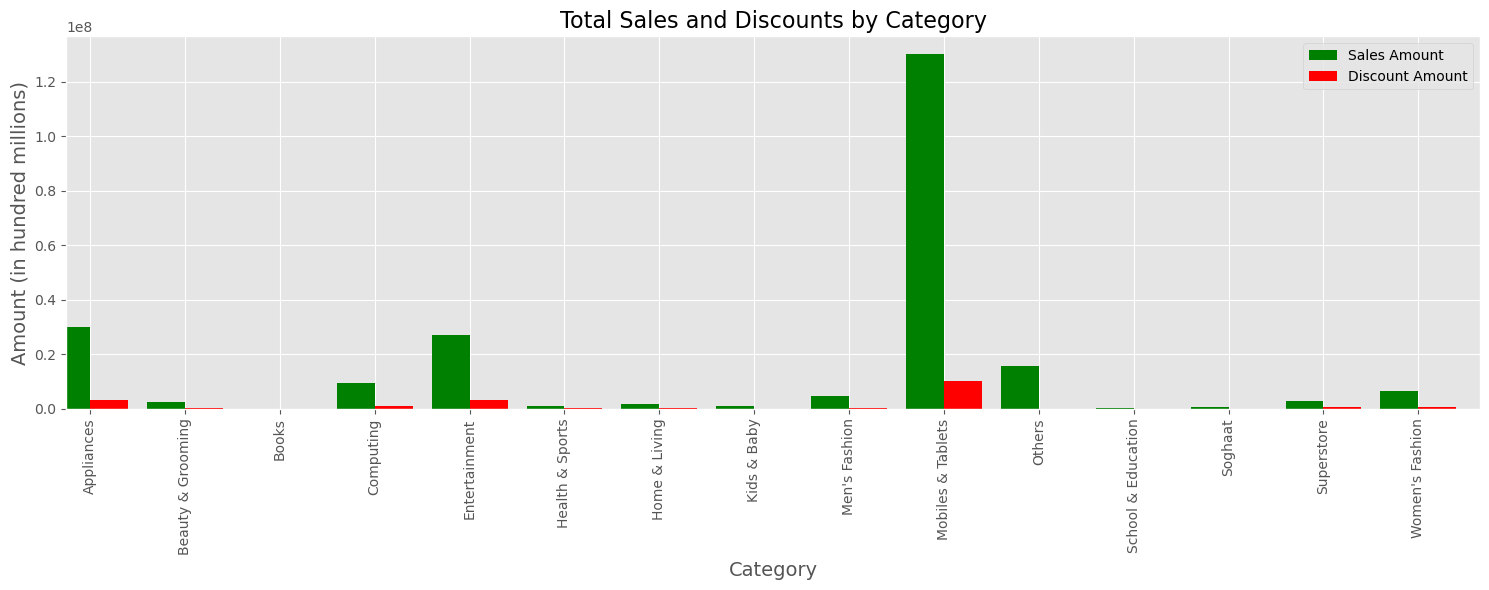

In [ ]:
# Total Amount & Discount Amount by Category plot
fig, ax = plt.subplots(figsize=(15, 6))  
# Plot Sales Amount bar
category_discount_df['Total Amount'].plot(kind='bar', color='green', ax=ax, width=0.4, position=1, label='Sales Amount')
# Plot Discount Amount bar
category_discount_df['Discount Amount'].plot(kind='bar', color='red', ax=ax, width=0.4, position=0, label='Discount Amount')

# labels, titles, legend, xticks
ax.set_xlabel('Category', fontsize=14)
ax.set_ylabel('Amount (in hundred millions)', fontsize=14)
ax.set_title('Total Sales and Discounts by Category', fontsize=16)
ax.legend()
plt.xticks(rotation=90)
plt.tight_layout()

plt.savefig("Images/10. Total Sales and Discounts by Category (bar).png")
plt.show()

#### Total Sales, Discount Amount & Order Quantity

In [ ]:
#create dataframe for total sales, discount amount, quantity, category
multi_aggs_df = gh_main_df.groupby('category').agg({'Total Amount': 'sum', 
                                                    'Discount Amount': 'sum',
                                                    'Order Quantity': 'sum'})
                                                    
multi_aggs_df.head()

Total Amount  Discount Amount  Order Quantity
category                                                        
Appliances         3.006084e+07     3.380578e+06           82435
Beauty & Grooming  2.644748e+06     2.458920e+05           71122
Books              3.241695e+04     6.133828e+02            2163
Computing          9.362343e+06     9.950933e+05           20506
Entertainment      2.713843e+07     3.291045e+06           34788

<Figure size 1200x600 with 0 Axes>

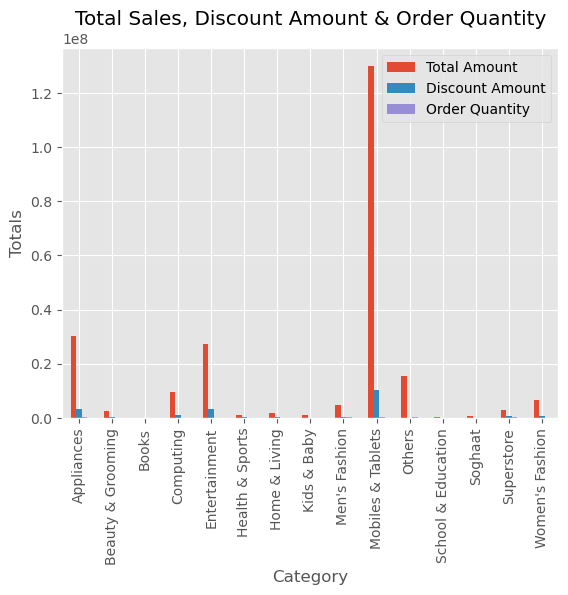

In [ ]:
# Time Series Analysis 
plt.figure(figsize=(12, 6))
multi_aggs_df.plot(kind='bar')
plt.title('Total Sales, Discount Amount & Order Quantity')
plt.xlabel('Category')
plt.ylabel('Totals')
plt.grid(True)
plt.xticks(rotation=90)

plt.savefig("Images/11. Total Sales, Discount Amount & Order Quantity.png")
plt.show()

### Weekly Sales, Quantity and Discount

In [ ]:
weekly_discount = gh_main_df['Discount Amount'].resample('W').sum()
weekly_discount.to_frame('Discount Amount')

Discount Amount
order_date                 
2020-10-04     4.408705e+04
2020-10-11     1.110000e+04
2020-10-18     3.921781e+04
2020-10-25     4.757065e+04
2020-11-01     7.462314e+04
2020-11-08     1.026879e+05
2020-11-15     1.698008e+06
2020-11-22     9.320075e+04
2020-11-29     6.630844e+04
2020-12-06     8.017903e+04
2020-12-13     2.170590e+05
2020-12-20     1.511730e+06
2020-12-27     5.065644e+06
2021-01-03     1.937636e+06
2021-01-10     7.706602e+04
2021-01-17     3.184266e+04
2021-01-24     2.712167e+04
2021-01-31     2.754591e+04
2021-02-07     9.725579e+04
2021-02-14     4.556717e+04
2021-02-21     7.454580e+03
2021-02-28     3.540000e+03
2021-03-07     2.419440e+05
2021-03-14     1.627179e+04
2021-03-21     1.954314e+05
2021-03-28     1.436789e+06
2021-04-04     1.523278e+06
2021-04-11     3.585097e+05
2021-04-18     1.389178e+06
2021-04-25     1.621954e+05
2021-05-02     2.693397e+05
2021-05-09     8.962357e+03
2021-05-16     1.397996e+04
2021-05-23     2.627250e+05
2021-05-30     2.429882e+04
2021-06-06     3.982691e+05
2021-06-13     6.761628e+05
2021-06-20     5.969109e+05
2021-06-27     1.715366e+05
2021-07-04     2.821830e+05
2021-07-11     8.923676e+04
2021-07-18     1.637295e+04
2021-07-25     3.328935e+04
2021-08-01     4.057213e+04
2021-08-08     3.031013e+04
2021-08-15     1.200106e+04
2021-08-22     1.611119e+04
2021-08-29     2.128746e+04
2021-09-05     1.544972e+04
2021-09-12     3.219695e+04
2021-09-19     4.041439e+05
2021-09-26     1.226907e+04
2021-10-03     1.080013e+03

In [ ]:
weekly_quantity = gh_main_df['Order Quantity'].resample('W').sum()
weekly_quantity.to_frame('Order Quantity')

Order Quantity
order_date                
2020-10-04            3635
2020-10-11            4763
2020-10-18            4743
2020-10-25            5302
2020-11-01            5215
2020-11-08            7359
2020-11-15           18948
2020-11-22           10974
2020-11-29            6252
2020-12-06            5986
2020-12-13            9222
2020-12-20           41438
2020-12-27          100611
2021-01-03           35074
2021-01-10           14339
2021-01-17           13896
2021-01-24            7744
2021-01-31            5540
2021-02-07           11733
2021-02-14           11870
2021-02-21            4962
2021-02-28            4259
2021-03-07           18545
2021-03-14            6949
2021-03-21           30592
2021-03-28           34897
2021-04-04           27583
2021-04-11           15306
2021-04-18           35190
2021-04-25           15579
2021-05-02           78733
2021-05-09            5844
2021-05-16            6487
2021-05-23           16357
2021-05-30            8616
2021-06-06           11431
2021-06-13           27238
2021-06-20           21457
2021-06-27           19148
2021-07-04           34827
2021-07-11           15227
2021-07-18            8100
2021-07-25            8881
2021-08-01            8266
2021-08-08            6348
2021-08-15            6635
2021-08-22            8001
2021-08-29            6745
2021-09-05            6513
2021-09-12            7768
2021-09-19           25057
2021-09-26            4082
2021-10-03            2144

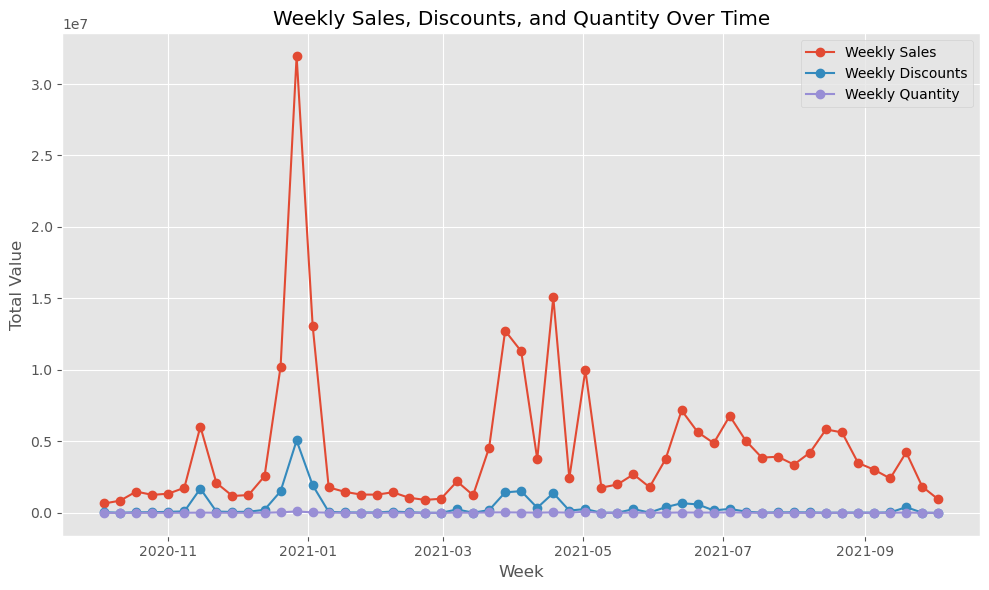

In [ ]:
# Create the plot
plt.figure(figsize=(10, 6))  
plt.plot(weekly_sales.index, weekly_sales, label='Weekly Sales', marker='o')  # Line for sales
plt.plot(weekly_discount.index, weekly_discount, label='Weekly Discounts', marker='o')  # Line for discounts
plt.plot(weekly_quantity.index, weekly_quantity, label='Weekly Quantity', marker='o')  # Line for quantity

# Title and labels
plt.title('Weekly Sales, Discounts, and Quantity Over Time')
plt.xlabel('Week')
plt.ylabel('Total Value')
plt.legend()  
plt.grid(True)
#plt.gcf().autofmt_xdate()  # Auto format date
plt.tight_layout()

plt.savefig("Images/12. Weekly Sales, Discounts, and Quantity Over Time (line).png")
plt.show()

#### Weekly Discount Percent and Quantity Over Time

In [ ]:
# function to calculate mean
def calc_mean(values):
    return values.mean() 

In [ ]:
# Total Sales (mean)
weekly_sales_mean = gh_main_df["Total Amount"].resample('W').apply(calc_mean)
# Discount Amount (mean)
weekly_discount_mean = gh_main_df["Discount Amount"].resample('W').apply(calc_mean)
# Discount Percent (mean)
weekly_discount_percent_mean = gh_main_df["Discount Percent"].resample('W').apply(calc_mean)
# Order Quantity (mean)
weekly_quantity_mean = gh_main_df["Order Quantity"].resample('W').apply(calc_mean)

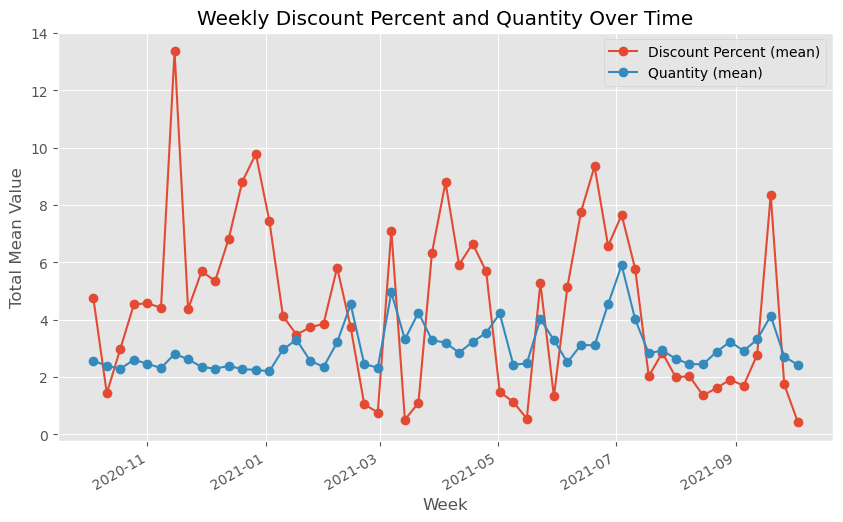

In [ ]:
# plot Weekly Sales (mean), Discount Amount (mean), and Quantity (mean) Over Time 

# Create the plot
plt.figure(figsize=(10, 6))  
#plt.plot(weekly_sales_mean.index, weekly_sales_mean, label='Weekly Sales (mean)', marker='o')  # Line for sales
#plt.plot(weekly_discount_mean.index, weekly_discount_mean, label='Discount Amount (mean)', marker='o')  # Line for discounts
plt.plot(weekly_discount_percent_mean.index, weekly_discount_percent_mean, label='Discount Percent (mean)', marker='o')  # Line for discount percent
plt.plot(weekly_quantity_mean.index, weekly_quantity_mean, label='Quantity (mean)', marker='o')  # Line for quantity

# Title and labels
plt.title('Weekly Discount Percent and Quantity Over Time')
plt.xlabel('Week')
plt.ylabel('Total Mean Value')
plt.legend()  
plt.grid(True)
plt.gcf().autofmt_xdate()  # Auto format date

plt.savefig("Images/13. Weekly Discount Percent and Quantity Over Time (line).png")
plt.show()

In [ ]:
corr_qty_vs_discount = weekly_quantity_mean.corr(weekly_discount_percent_mean, method='pearson')

print(f"Correlation between mean Order Quantity and mean Discount percent: {corr_qty_vs_discount:.2f}")

Correlation between mean Order Quantity and mean Discount percent: 0.17


**Correlation between Discount and Sales**: There seems to be little correlation between the discount percentage and quantity sold. Higher peaks in the discount percentage often correspond to increases in sales quantity, which suggests that larger discounts may drive higher sales volumes on some occasions.  
**Promotional Peaks**: The highest peaks in discount percentage, particularly noticeable at the start of 2021 and throughout 2021, are often followed by spikes in quantity sold. This pattern could be indicative of special promotional events or sales campaigns.  
**Varying Impact**: While there is a general trend that higher discounts lead to more sales, the impact varies. Some spikes in discounts do not correspond with similarly large increases in sales, suggesting that other factors may be influencing. 

#### Discount Amount and Quantity Over Time (in weeks)

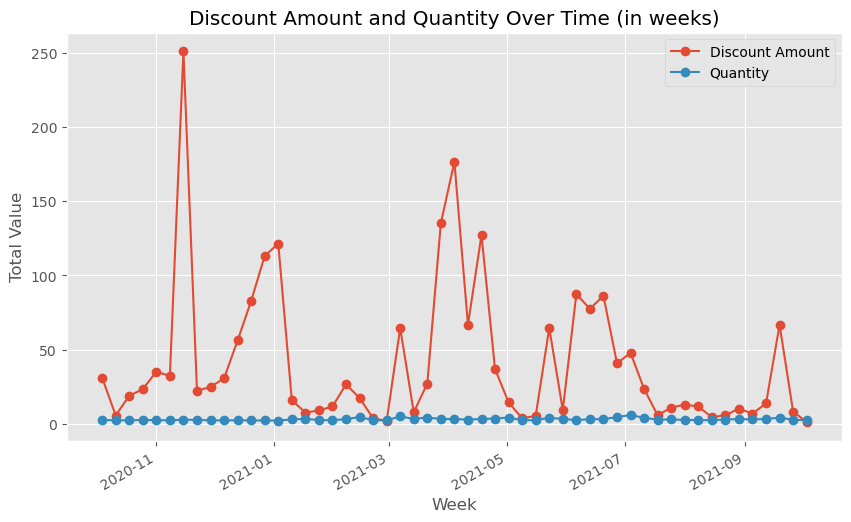

In [ ]:
# plot Discount Amount (mean) and Quantity (mean) Over Time (in weeks)

# Create the plot
plt.figure(figsize=(10, 6))  
#plt.plot(weekly_sales.index, weekly_sales, label='Weekly Sales', marker='o')  # Line for sales
plt.plot(weekly_discount_mean.index, weekly_discount_mean, label='Discount Amount', marker='o')  # Line for discount amount
plt.plot(weekly_quantity_mean.index, weekly_quantity_mean, label='Quantity', marker='o')  # Line for quantity

# Title and labels
plt.title('Discount Amount and Quantity Over Time (in weeks)')
plt.xlabel('Week')
plt.ylabel('Total Value')
plt.legend()  
plt.grid(True)
plt.gcf().autofmt_xdate()  # Auto format date

plt.savefig("Images/14. Discount Amount and Quantity Over Time (line).png")
plt.show()

In [ ]:
corr_qty_vs_discount = gh_main_df['Order Quantity'].corr(gh_main_df['Discount Percent'], method='pearson')

print(f"Correlation between Order Quantity and Discount percent: {corr_qty_vs_discount:.2f}")

Correlation between Order Quantity and Discount percent: 0.07


#### There does not appear to be any correlation between Order Quantity and Discount percent

### Weekly Sales by Categories

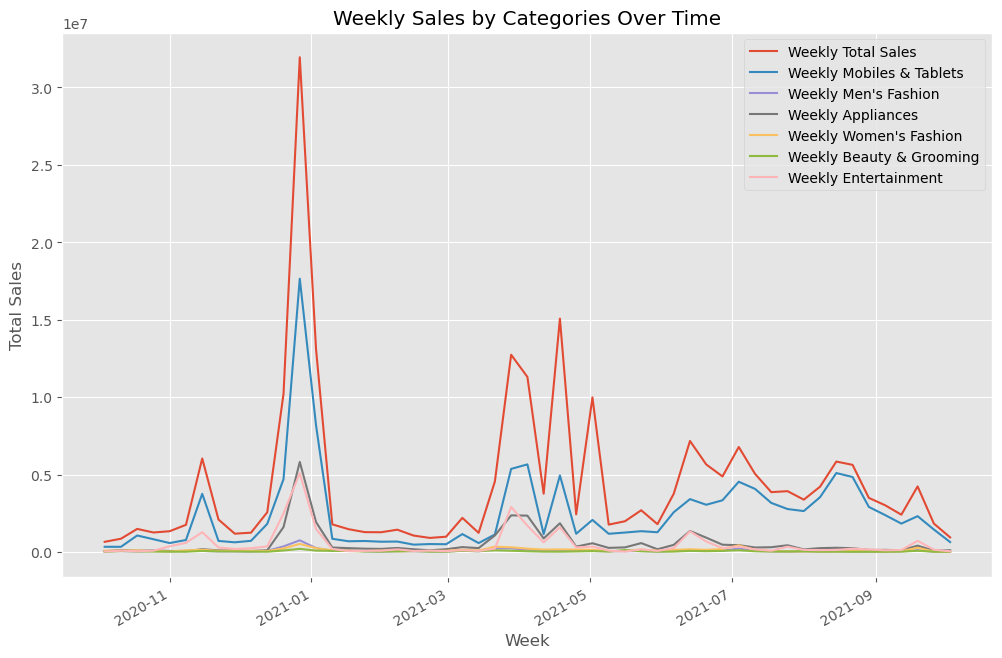

In [ ]:
def resample_data(df):
    #Resample weekly data and sum 'Total Amount'
    return df['Total Amount'].resample('W').sum()

# Dictionary for categories
plot_categories = {
    "Total Sales":       gh_main_df,
    "Mobiles & Tablets": gh_main_df[gh_main_df["category"] == "Mobiles & Tablets"],
    "Men's Fashion":     gh_main_df[gh_main_df["category"] == "Men's Fashion"],
    "Appliances":        gh_main_df[gh_main_df["category"] == "Appliances"],
    "Women's Fashion":   gh_main_df[gh_main_df["category"] == "Women's Fashion"],
    "Beauty & Grooming": gh_main_df[gh_main_df["category"] == "Beauty & Grooming"],
    "Entertainment":     gh_main_df[gh_main_df["category"] == "Entertainment"]
}

# Resample data for each category and store in a dictionary
weekly_sales = {k: resample_data(v) for k, v in plot_categories.items()}

# Create the plot
plt.figure(figsize=(12, 8))

# Generate plots for each category
for plot_category, data in weekly_sales.items():
    plt.plot(data.index, data, label=f'Weekly {plot_category}')

# Title and labels
plt.title('Weekly Sales by Categories Over Time')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.legend()  
plt.grid(True)
plt.gcf().autofmt_xdate()  # Auto format date

plt.savefig("Images/15. Weekly Sales by Categories Over Time.png")
plt.show()

**Peak Sales**: All categories show a massive spike in sales between December 2020 to early January 2021. This peak is especially pronounced for mobiles and tablets. This could indicate a special event like a major holiday sale.  
**Total Sales**: The total sales trend (red line) closely follows the peaks and troughs of the mobiles and tablets category, suggesting that this category may have a significant impact on the overall sales volume.  
**Seasonal Trends**: The other categories also show smaller peaks and troughs, which might indicate seasonal sales patterns.  
**Comparison of Categories**: Post the big peak in early 2021, mobiles and tablets sales tend to dominate over other categories, maintaining higher overall weekly sales. This suggests that consumer interest or demand in this category is consistently higher than in others.

DZEMAL's PLOT

In [543]:
main_df.columns

Index(['order_id', 'order_date', 'status', 'item_id', 'sku', 'qty_ordered',
       'price', 'value', 'discount_amount', 'total', 'category',
       'payment_method', 'bi_st', 'cust_id', 'year', 'month', 'Gender', 'age',
       'full_name', 'Discount_Percent'],
      dtype='object')

In [550]:
main_df_sorted_by_order_date = main_df.sort_values(by=['order_date'])
main_df_sorted_by_order_date.head(20)

order_id order_date          status  item_id  \
0     100354678 2020-10-01        received   574772   
2403  100354886 2020-10-01        canceled   575170   
2402  100354884 2020-10-01        complete   575168   
2401  100354884 2020-10-01        complete   575167   
2400  100354883 2020-10-01        complete   575166   
2398  100354880 2020-10-01        complete   575160   
2397  100354880 2020-10-01        complete   575159   
2395  100354882 2020-10-01        received   575165   
2393  100354879 2020-10-01        canceled   575158   
2392  100354876 2020-10-01  order_refunded   575155   
2389  100354878 2020-10-01        complete   575157   
2364  100354877 2020-10-01        complete   575156   
2363  100354875 2020-10-01  order_refunded   575154   
2362  100354874 2020-10-01        complete   575153   
2361  100354874 2020-10-01        complete   575152   
2360  100354881 2020-10-01        complete   575163   
2359  100354881 2020-10-01        complete   575161   
2358  100354873 2020-10-01  order_refunded   575150   
2404  100354886 2020-10-01        canceled   575171   
2405  100354886 2020-10-01        canceled   575172   

                                                    sku  qty_ordered  \
0                                    oasis_Oasis-064-36           21   
2403                                    GA_BS-11-136012            2   
2402                        NN_Crystal Jelly Orange 80g           11   
2401                                  Uni-Dove-Lux-deal           11   
2400                                           MTA_1032            2   
2398                 iGeek_FidgetSpinnerToyMetal-Silver            2   
2397           igeek__Packof3FidgetSpinnerStressReducer            2   
2395                                  KureshiC_100-wled            3   
2393                                PTCL_Charji EVO TAB            2   
2392                                          BT_BT-263            3   
2389                                  Jaza_2Sela5kg+FOC            2   
2364                  Peacock_Sandwhich maker - peacock            2   
2363                        igeek_EZCast_Wifi_TV_Dongle            2   
2362                                   GA_CT-168-136043            2   
2361                                   GA_CT-161-136033            2   
2360  mdeal_MD-White-V-Neck-Tshirt-Full-Sleeves-For-...            3   
2359                                    mdeal_DMC-144-M            3   
2358                                        DOH_DOH-4-S            2   
2404                         Infinix_HotSmartX5010-Gold            2   
2405                    Samsung-Galaxy-J5-Pro-J530-Gold            1   

         price     value  discount_amount     total           category  \
0       89.900  1798.000             0.00  1798.000      Men's Fashion   
2403   393.800   393.800             0.00   393.800    Women's Fashion   
2402     5.500    55.000             0.00    55.000            Soghaat   
2401    44.000   440.000             0.00   440.000         Superstore   
2400    35.000    35.000             0.00    35.000  Mobiles & Tablets   
2398    67.000    67.000             0.00    67.000        Kids & Baby   
2397    44.500    44.500             0.00    44.500        Kids & Baby   
2395    29.900    59.800             0.00    59.800      Men's Fashion   
2393  1000.000  1000.000             0.00  1000.000  Mobiles & Tablets   
2392    12.500    25.000             0.00    25.000  Mobiles & Tablets   
2389   161.211   161.211             0.00   161.211         Superstore   
2364   105.000   105.000             0.00   105.000         Appliances   
2363   146.500   146.500             0.00   146.500      Entertainment   
2362   454.300   454.300             0.00   454.300    Women's Fashion   
2361   416.400   416.400             0.00   416.400    Women's Fashion   
2360    22.500    45.000            11.03    33.970      Men's Fashion   
2359    99.900   199.800            48.97   150.830      Men's Fashion   
2358  

In [562]:
# Calculate average price by month
average_price_per_month = main_df.groupby('month')['price'].mean().reset_index()
average_price_per_month.head(20)

month        price
0   Apr-21   753.962569
1   Aug-21  1459.781430
2   Dec-20   882.909287
3   Feb-21   533.094016
4   Jan-21   400.486089
5   Jul-21  1116.254925
6   Jun-21  1242.604976
7   Mar-21   884.098103
8   May-21   578.746795
9   Nov-20   598.358800
10  Oct-20   542.713783
11  Sep-21   964.423811

In [569]:
# Convert 'month' column to datetime format
average_price_per_month['month'] = pd.to_datetime(average_price_per_month['month'], format='%b-%y')

# Sort the DataFrame by the 'month' column
average_price_per_month_sorted = average_price_per_month.sort_values(by='month')

# Display the sorted DataFrame
print(average_price_per_month_sorted.head(20))

        month        price
10 2020-10-01   542.713783
9  2020-11-01   598.358800
2  2020-12-01   882.909287
4  2021-01-01   400.486089
3  2021-02-01   533.094016
7  2021-03-01   884.098103
0  2021-04-01   753.962569
8  2021-05-01   578.746795
6  2021-06-01  1242.604976
5  2021-07-01  1116.254925
1  2021-08-01  1459.781430
11 2021-09-01   964.423811


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


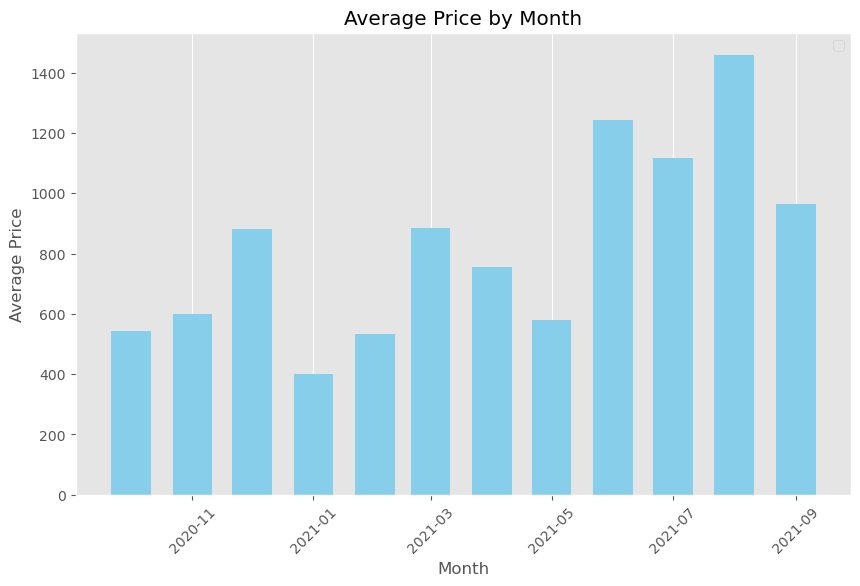

In [576]:
# Create a range of dates covering all months and years
#date_range = pd.date_range(start=main_df['month'].min(), end=main_df['month'].max(), freq='MS')

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(average_price_per_month['month'], average_price_per_month['price'], color='skyblue', width=20)
plt.title('Average Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines on the y-axis
plt.legend()
plt.show()